# HW5

Miembros del grupo:
- 
- 
-

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read data

In [18]:
df = pd.read_csv("/Users/juan/Documents/Juan's MacBook Pro/CUNEF/Quinto/Credit Risk Analytics/data/prosperLoanData_train.csv")
df_val = pd.read_csv("/Users/juan/Documents/Juan's MacBook Pro/CUNEF/Quinto/Credit Risk Analytics/data/prosperLoanData_val.csv")
df_oot = pd.read_csv("/Users/juan/Documents/Juan's MacBook Pro/CUNEF/Quinto/Credit Risk Analytics/data/prosperLoanData_oot.csv")

/var/folders/41/_wb9xl2j5mx33x3_7jr_cvx00000gp/T/ipykernel_39676/1416925790.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/juan/Documents/Juan's MacBook Pro/CUNEF/Quinto/Credit Risk Analytics/data/prosperLoanData_train.csv")


In [19]:
df.groupby('bad').size()

bad
False    15927
True      1060
dtype: int64

In [20]:
df[["ListingCreationDate", "FirstRecordedCreditLine"]].dtypes

ListingCreationDate        object
FirstRecordedCreditLine    object
dtype: object

In [21]:
[c for c in df.columns if 'listing' in c.lower()]

['ListingKey',
 'ListingNumber',
 'ListingCreationDate',
 'ListingCategory (numeric)',
 'ScorexChangeAtTimeOfListing']

## Differenciate between usable features and other columns

In [22]:
df_columns = pd.read_excel("/Users/juan/Documents/Juan's MacBook Pro/CUNEF/Quinto/Credit Risk Analytics/data_solved/Clasificacion_columnas_sol.xlsx")
drop = df_columns.loc[df_columns["Keep/Drop"]=="Drop"].Column.values

In [23]:
drop

array(['ListingKey', 'ListingNumber', 'CreditGrade', 'LoanStatus',
       'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore',
       'GroupKey', 'DateCreditPulled', 'LoanKey',
       'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber',
       'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginationDate',
       'LoanOriginationQuarter', 'MemberKey', 'MonthlyLoanPayment',
       'LP_CustomerPayments', 'LP_CustomerPrincipalPayments',
       'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees',
       'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
       'LP_NonPrincipalRecoverypayments', 'InvestmentFromFriendsCount',
       'InvestmentFromFriendsAmount', 'Investors',
       'LoanMonthsSinceOriginationY', 'LoanFirstDefaultedCycleNumberQ',
       'bad_aux', 'PW', 'fraud', 'bad', 'indeterm', 'LoanOriginationYear'],
    

In [24]:
features = [c for c in df.columns if c not in drop]
col_target = 'bad'

## Data exploration

In [25]:
# split between categorical and numerical features
cat_features = df[features].select_dtypes(include=["bool", "object"]).columns.tolist()
num_features = [f for f in features if f not in cat_features]

In [26]:
df[num_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Term,16987.0,38.547360,9.553738,12.0,36.00,36.000000,36.000000,60.000000
ListingCategory (numeric),16987.0,3.840290,4.103710,0.0,1.00,2.000000,7.000000,20.000000
EmploymentStatusDuration,16982.0,90.379225,89.131565,0.0,27.00,61.000000,126.000000,755.000000
CreditScoreRangeLower,16987.0,701.827280,53.510729,600.0,660.00,700.000000,740.000000,880.000000
CreditScoreRangeUpper,16987.0,720.827280,53.510729,619.0,679.00,719.000000,759.000000,899.000000
CurrentCreditLines,16987.0,9.443398,5.285003,0.0,6.00,9.000000,12.000000,40.000000
OpenCreditLines,16987.0,8.326485,4.740277,0.0,5.00,8.000000,11.000000,34.000000
TotalCreditLinespast7years,16987.0,26.197857,13.843854,2.0,16.00,24.000000,34.000000,120.000000
OpenRevolvingAccounts,16987.0,6.372402,4.224160,0.0,3.00,5.000000,8.000000,33.000000
OpenRevolvingMonthlyPayment,16987.0,355.054630,411.553102,0.0,92.00,225.000000,465.000000,5184.000000


In [27]:
df[cat_features].describe().transpose()

,count,unique,top,freq
ListingCreationDate,16987,16987,2011-12-08 14:14:48.073000000,1
BorrowerState,16987,48,CA,2135
Occupation,16987,67,Other,4460
EmploymentStatus,16987,7,Employed,10647
IsBorrowerHomeowner,16987,2,True,8875
CurrentlyInGroup,16987,2,False,16058
FirstRecordedCreditLine,16987,6428,1993-12-01 00:00:00,40
IncomeRange,16987,7,"$25,000-49,999",5420
IncomeVerifiable,16987,2,True,14992


In [28]:
# Feature engineering fechas:
# - FirstRecordedCreditLine: Capturar el número de meses entre ListingCreationDate, y FirstRecordedCreditLine
# - ListingCreationDate: Extraer el mes de creación

def normalize_date(df, col_date):
    df[col_date] = pd.to_datetime(df[col_date].apply(lambda x: x[:10]))
    
# Normalize FirstRecordedCreditLine, ListingCreationDate columns
normalize_date(df, "FirstRecordedCreditLine")
normalize_date(df, "ListingCreationDate")
normalize_date(df_val, "FirstRecordedCreditLine")
normalize_date(df_val, "ListingCreationDate")
normalize_date(df_oot, "FirstRecordedCreditLine")
normalize_date(df_oot, "ListingCreationDate")

# Compute the months between FirstRecordedCreditLine and ListingCreationDate
df["FirstCreditLine_to_Listing_Days"] = (df["ListingCreationDate"] - df["FirstRecordedCreditLine"]).dt.days
df_val["FirstCreditLine_to_Listing_Days"] = (df_val["ListingCreationDate"] - df_val["FirstRecordedCreditLine"]).dt.days
df_oot["FirstCreditLine_to_Listing_Days"] = (df_oot["ListingCreationDate"] - df_oot["FirstRecordedCreditLine"]).dt.days

# extract the month of the listing creation date
df["ListingCreationDate_Month"] = df["ListingCreationDate"].dt.month
df_val["ListingCreationDate_Month"] = df_val["ListingCreationDate"].dt.month
df_oot["ListingCreationDate_Month"] = df_oot["ListingCreationDate"].dt.month

# DROP: ListingCreationDate, FirstRecordedCreditLine
dates_drop = ["ListingCreationDate", "FirstRecordedCreditLine"]
features = [f for f in features if f not in dates_drop]
# Add new computed feature
features += ["FirstCreditLine_to_Listing_Days", "ListingCreationDate_Month"]

### Custom Pandas describing

**TODO 1** Crea una función que cumpla con la funcionalidad descrita en la cabecera de la función desc_num

In [29]:
def desc_num(df, df_oot, col):
    """Function that returns a custom descriptive for the numerical variable. It returns:
        - Mean, median, minimum, maximum, p25, p75, std, %na %nonzero, %unique
        - Histogram plot
        - Stability plot
    
    Args:
        df: Pandas DataFrame with the in time input data
        df_oot: Pandas DataFrame with the out of time input data
        col: Name of the column with the feature under study
        
    Returns:
        Dictionary that contains the main statistics of the feature, 
        also shows both the histogram and stability plots
    """
    
    mean, median = df[col].mean(), df[col].median()
    mn, mx = df[col].min(), df[col].max() 
    p25, p75 = df[col].quantile(0.25), df[col].quantile(0.75)
    std = df[col].std()
    na = 100. * df[col].isnull().sum() / len(df)
    nonzero = 100. * (df[col] != 0).sum() /len(df)
    unique = df[col].nunique()
    
    sns.set(rc={'figure.figsize':(18,7)})
    p1, p99 = df[col].quantile(0.01), df[col].quantile(0.99)
    bins = np.arange(p1, p99, (p99-p1)/10)
    sns.histplot(df[col], bins=bins, kde=False, stat='probability', color='b', alpha=0.5, label="IT")
    sns.histplot(df_oot[col], bins=bins, kde=False, stat='probability', color='orange', alpha=0.5, label="OOT")
    plt.legend()
    plt.show()
    
    return pd.DataFrame([{'mean': mean,
                         'median': median,
                         'minimum': mn,
                         'maximum': mx,
                         'p25': p25,
                         'p75': p75,
                         'std': std,
                         'na': na,
                         'nonzero': nonzero,
                         'unique': unique}])

In [30]:
#### EJECUTA AQUÍ LA FUNCIÓN desc_num para todas la variables numéricas

Results for Term


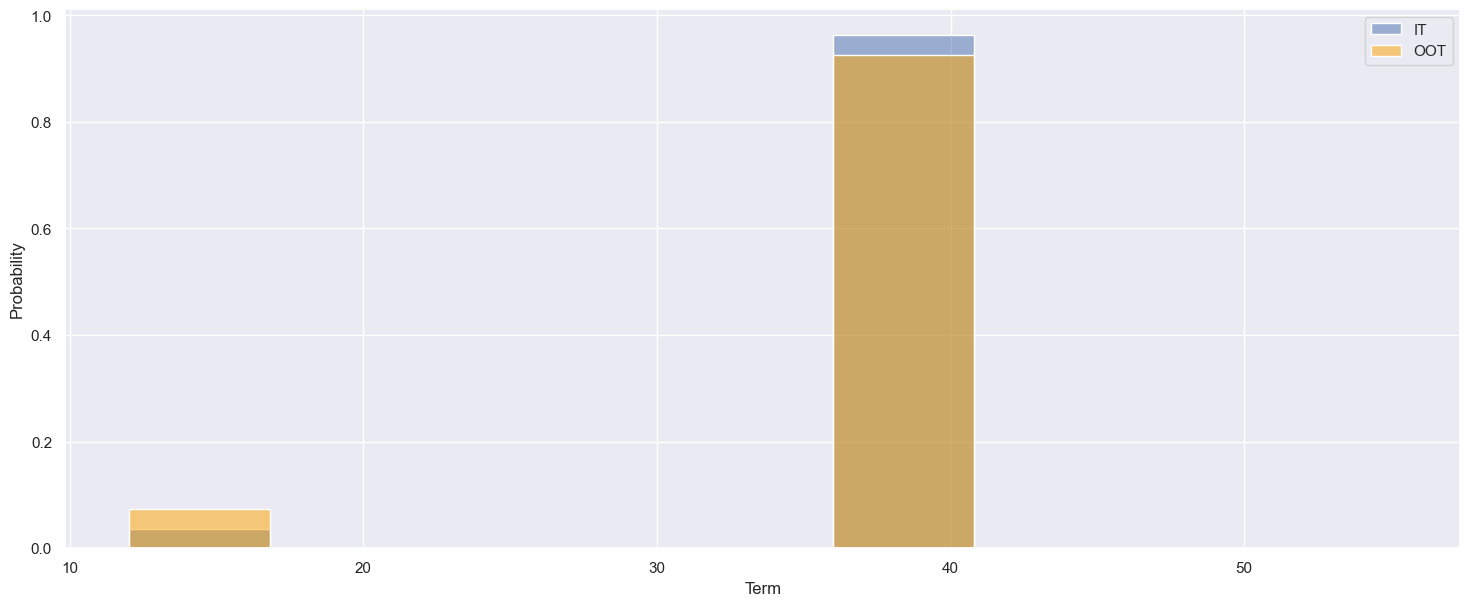

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,38.54736,36.0,12,60,36.0,36.0,9.553738,0.0,100.0,3


Results for ListingCategory (numeric)


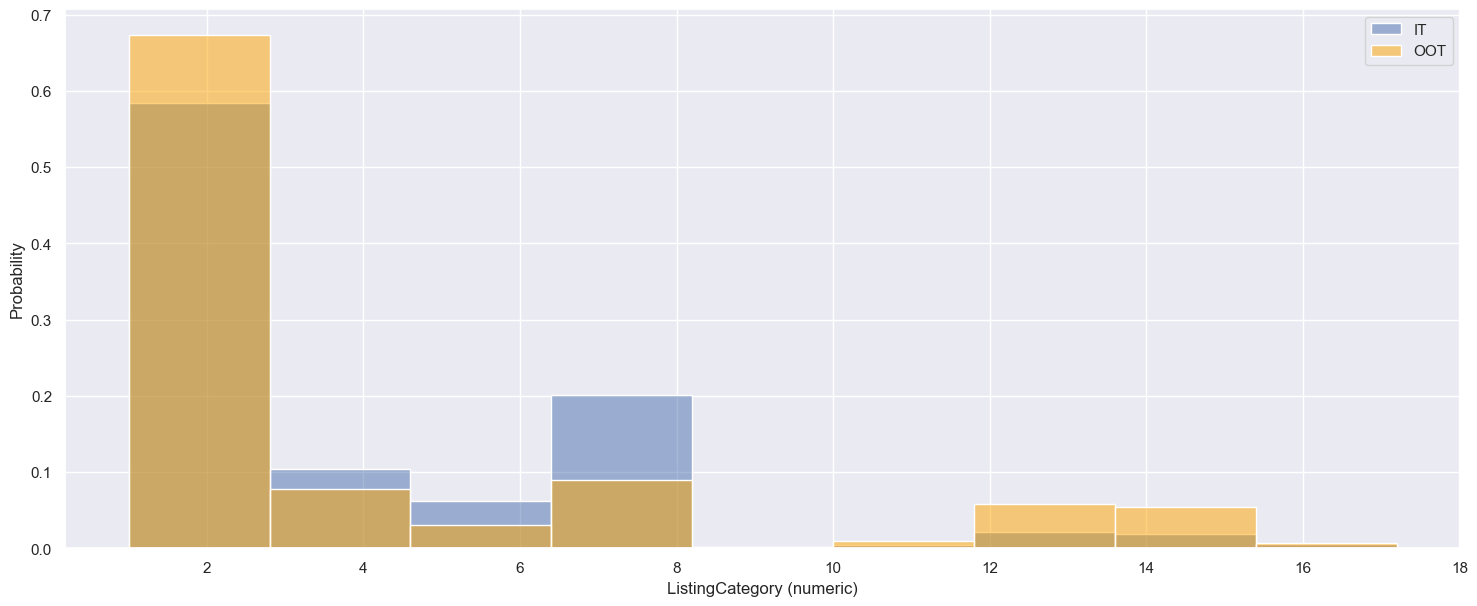

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,3.84029,2.0,0,20,1.0,7.0,4.10371,0.0,99.982339,20


Results for EmploymentStatusDuration


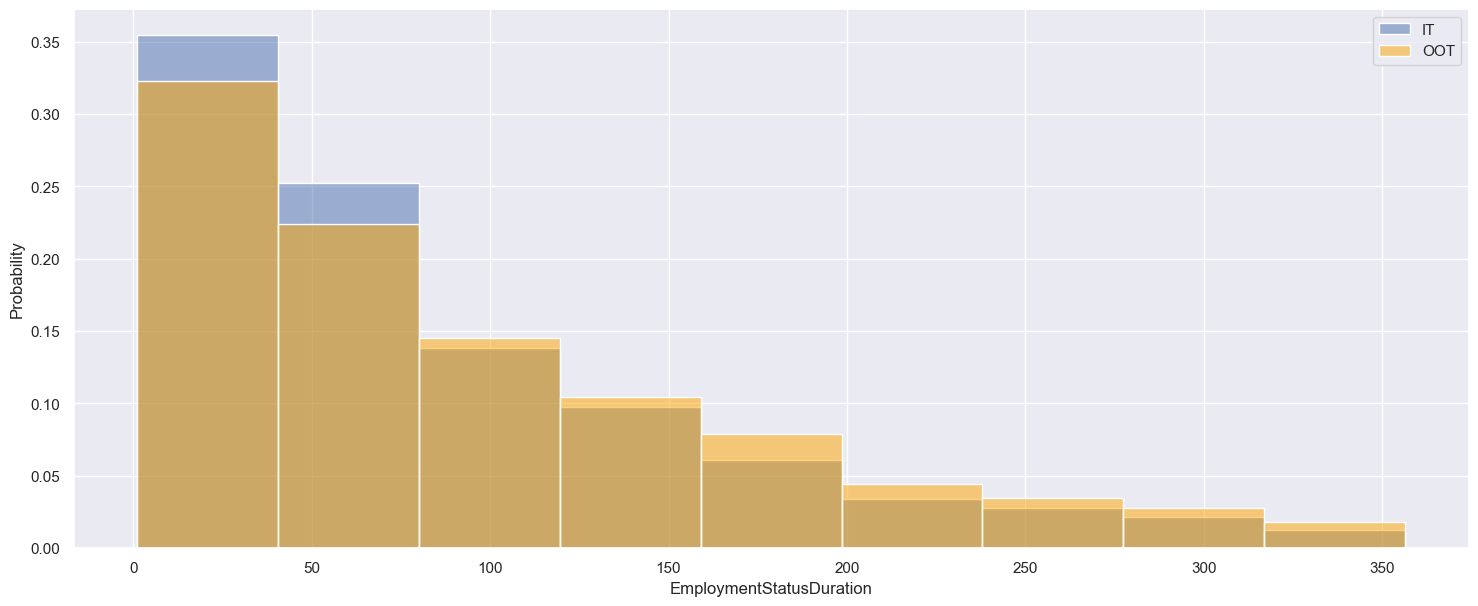

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,90.379225,61.0,0.0,755.0,27.0,126.0,89.131565,0.029434,99.352446,490


Results for CreditScoreRangeLower


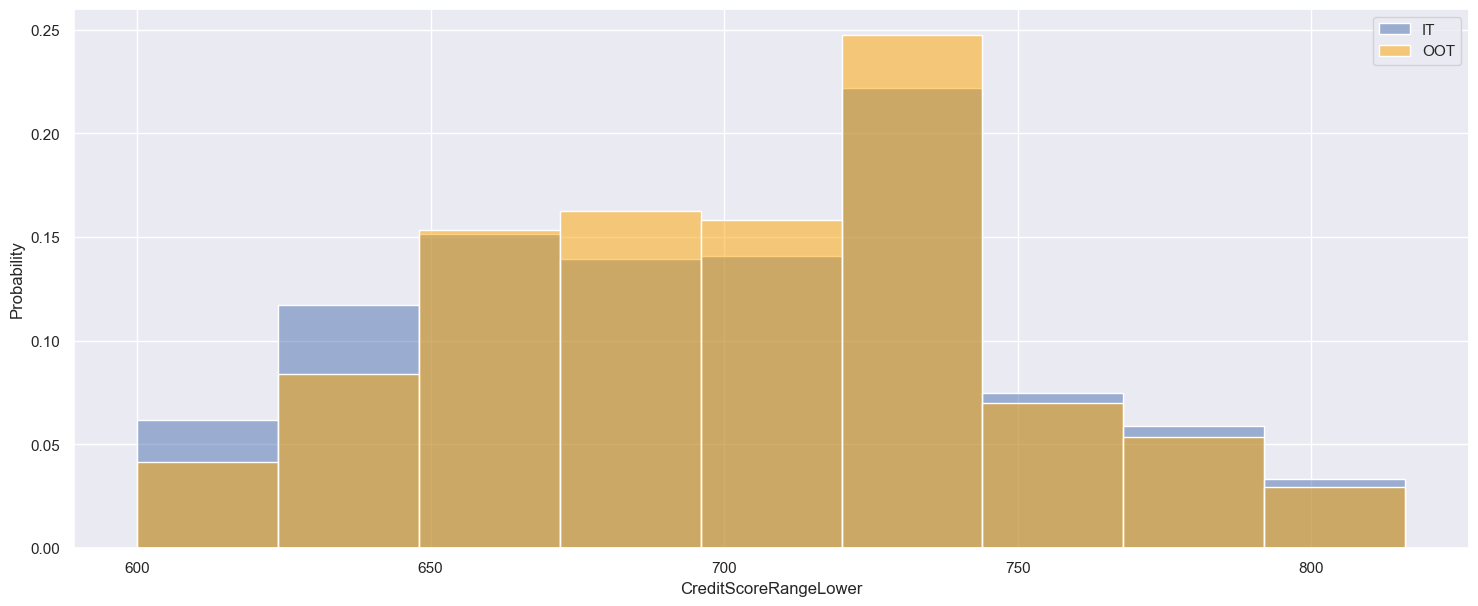

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,701.82728,700.0,600.0,880.0,660.0,740.0,53.510729,0.0,100.0,15


Results for CreditScoreRangeUpper


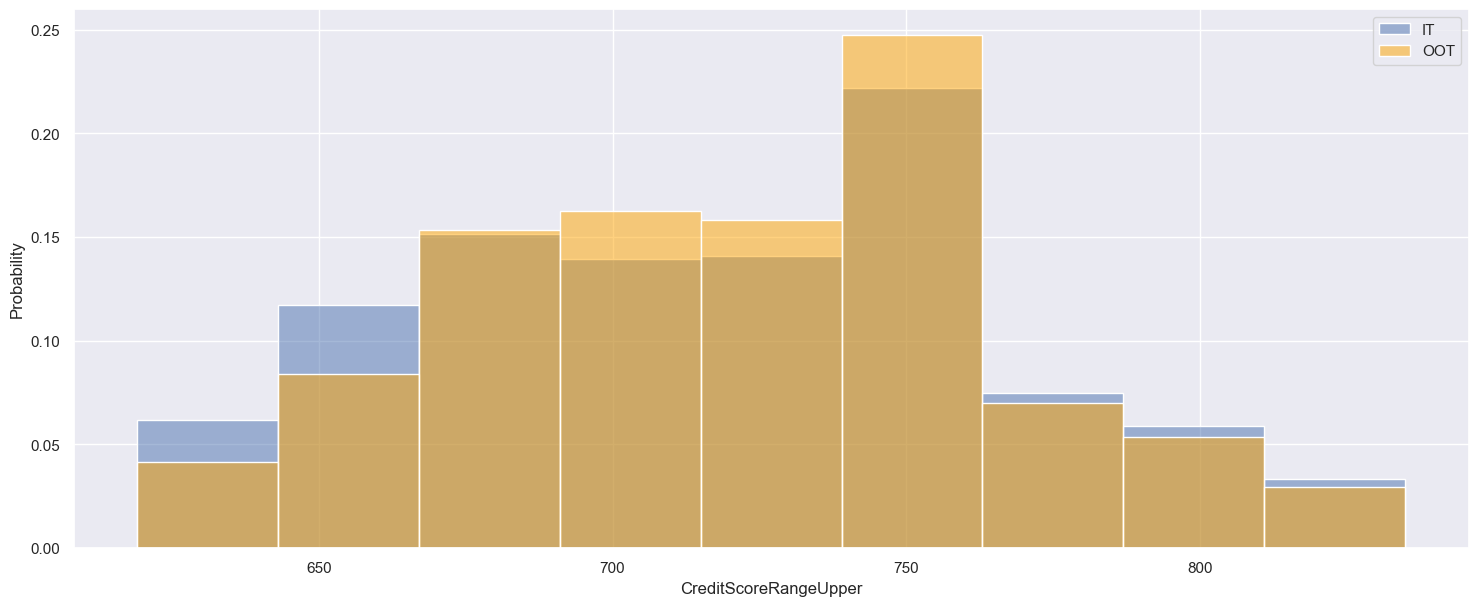

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,720.82728,719.0,619.0,899.0,679.0,759.0,53.510729,0.0,100.0,15


Results for CurrentCreditLines


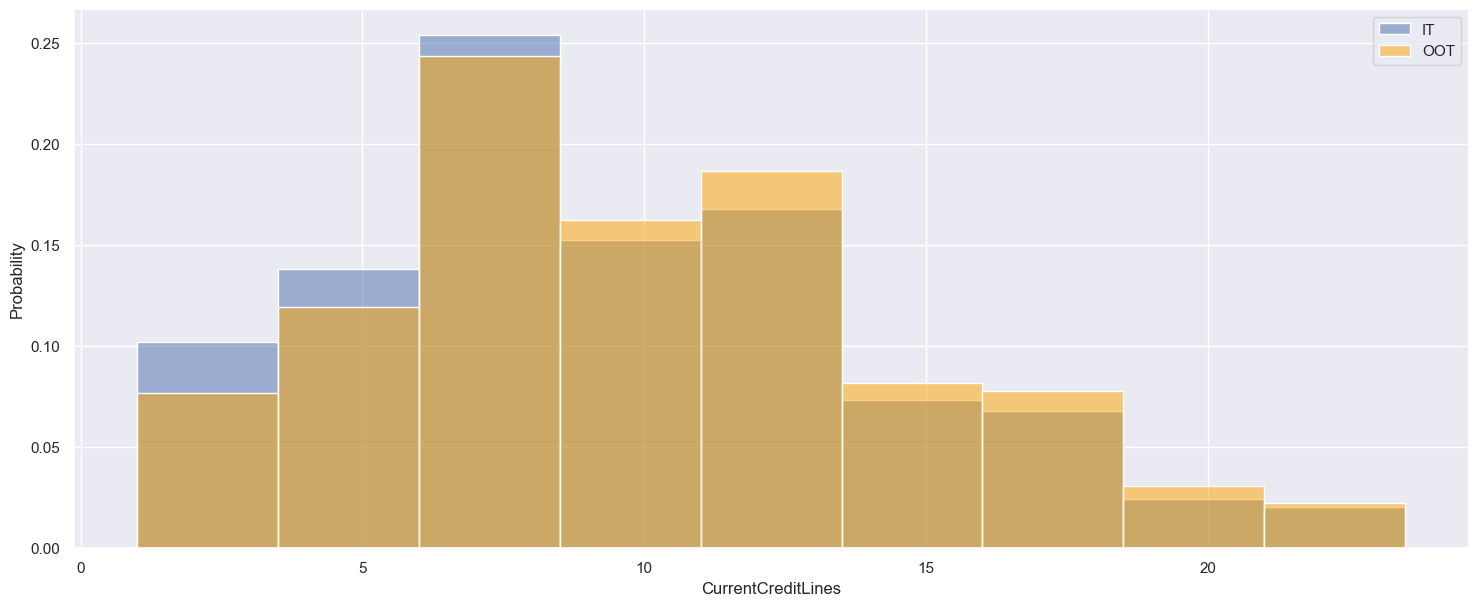

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,9.443398,9.0,0.0,40.0,6.0,12.0,5.285003,0.0,99.499617,40


Results for OpenCreditLines


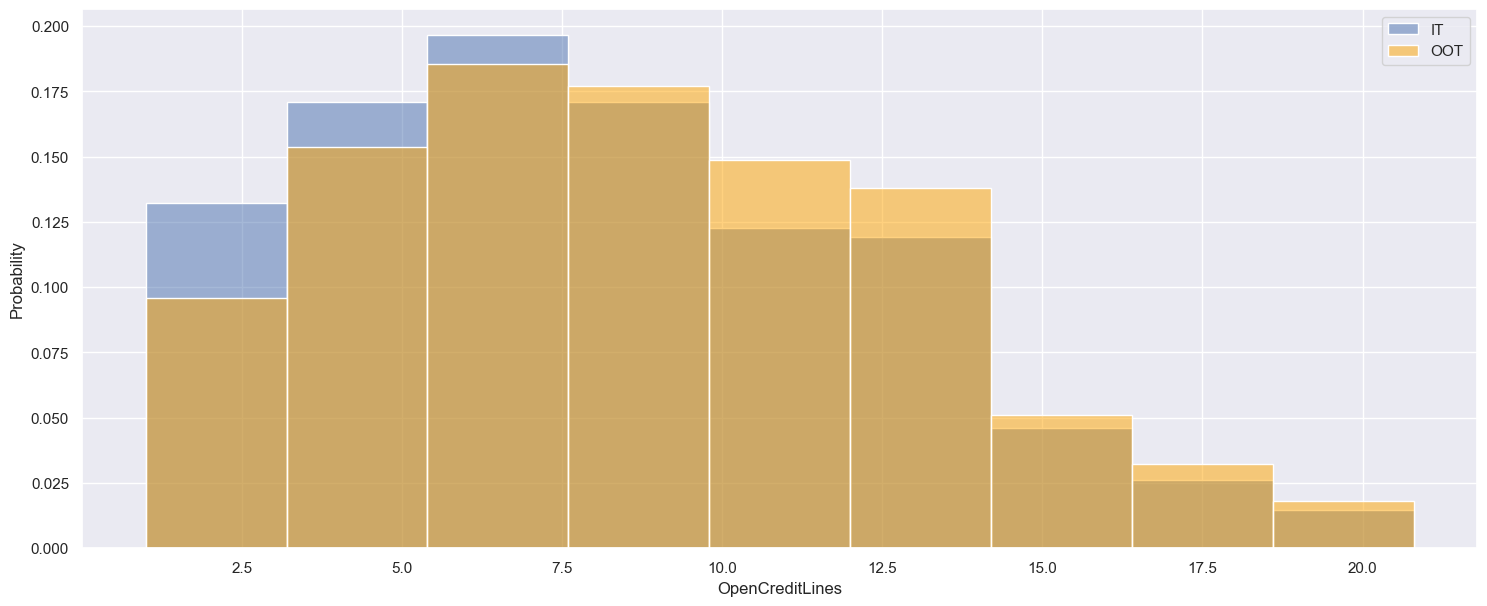

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,8.326485,8.0,0.0,34.0,5.0,11.0,4.740277,0.0,99.334785,35


Results for TotalCreditLinespast7years


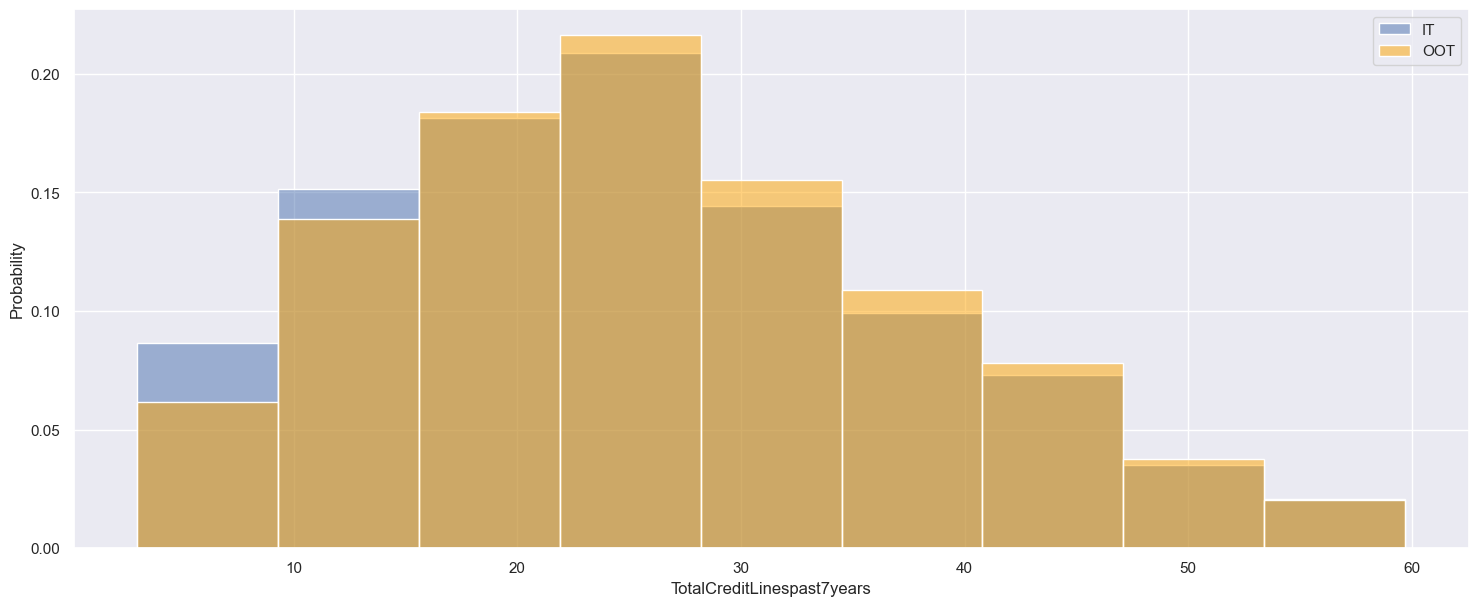

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,26.197857,24.0,2.0,120.0,16.0,34.0,13.843854,0.0,100.0,97


Results for OpenRevolvingAccounts


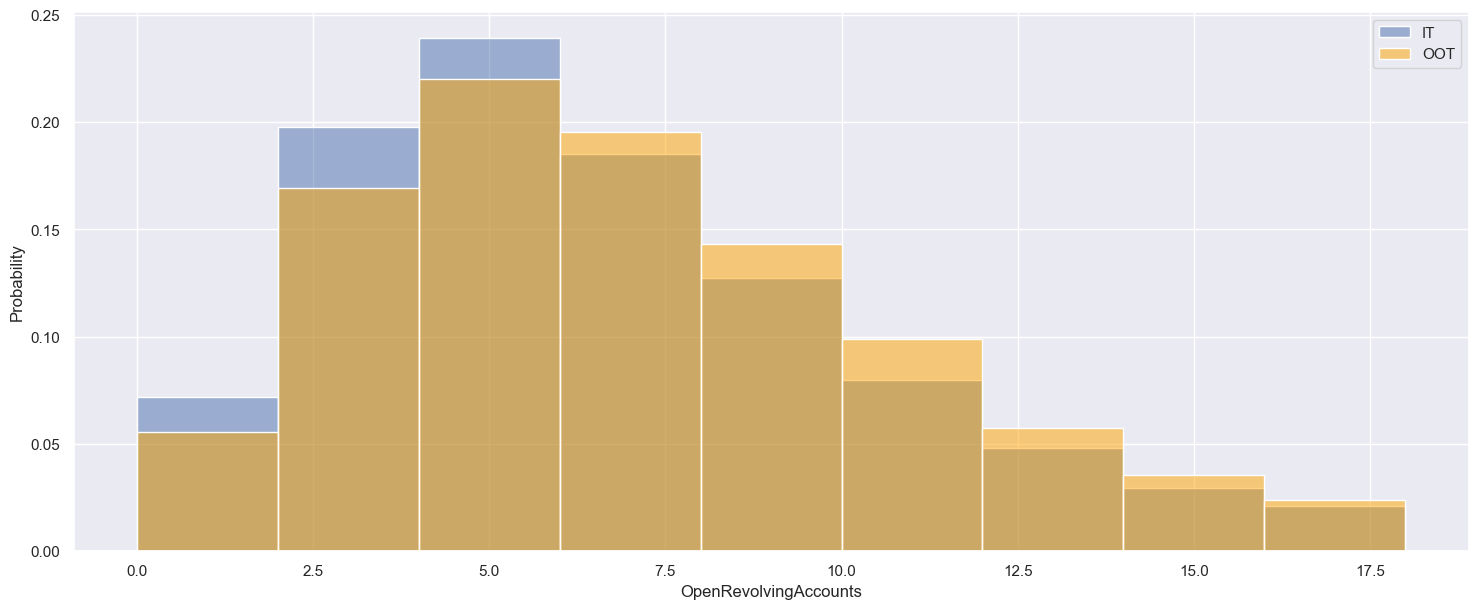

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,6.372402,5.0,0,33,3.0,8.0,4.22416,0.0,98.528286,34


Results for OpenRevolvingMonthlyPayment


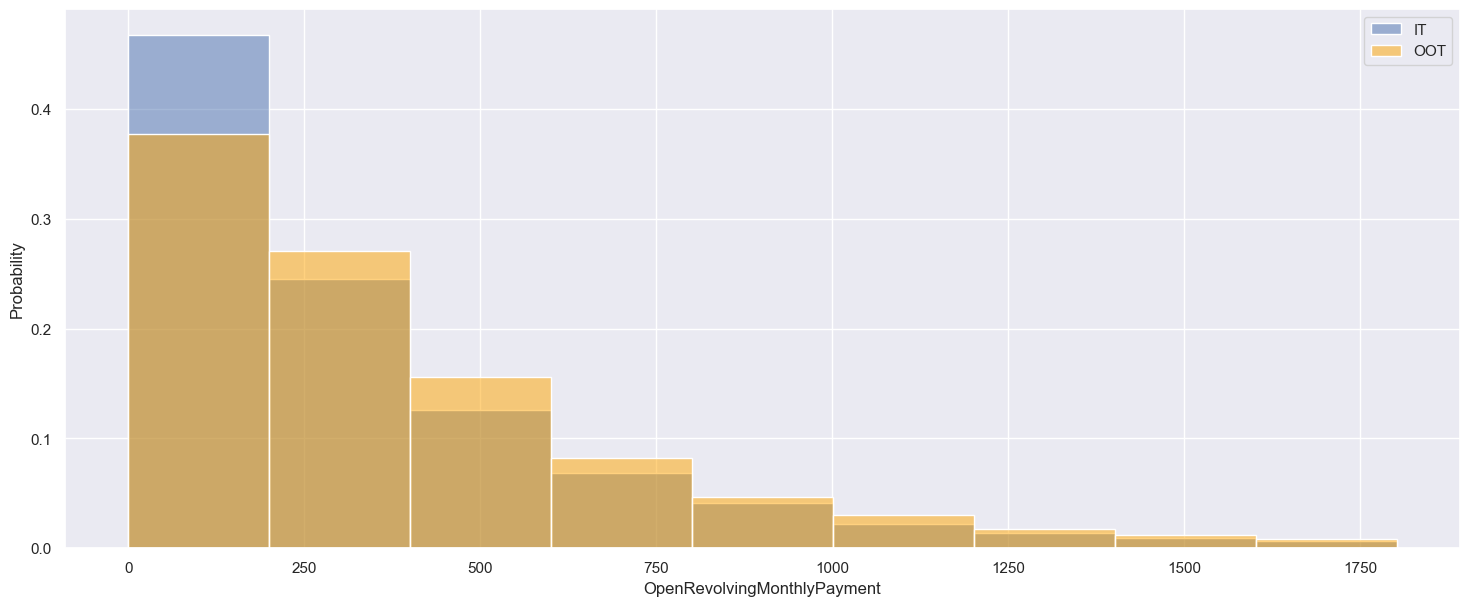

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,355.05463,225.0,0.0,5184.0,92.0,465.0,411.553102,0.0,97.109554,1706


Results for InquiriesLast6Months


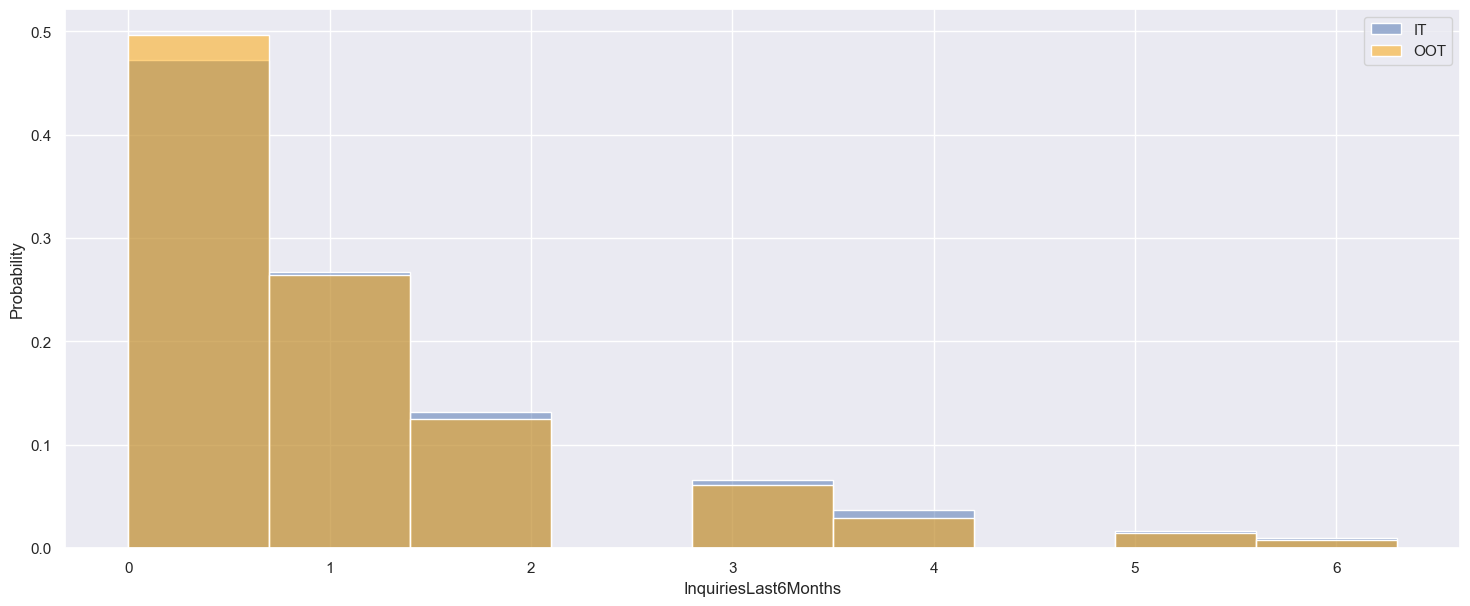

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,1.12174,1.0,0.0,27.0,0.0,2.0,1.611185,0.0,53.393772,19


Results for TotalInquiries


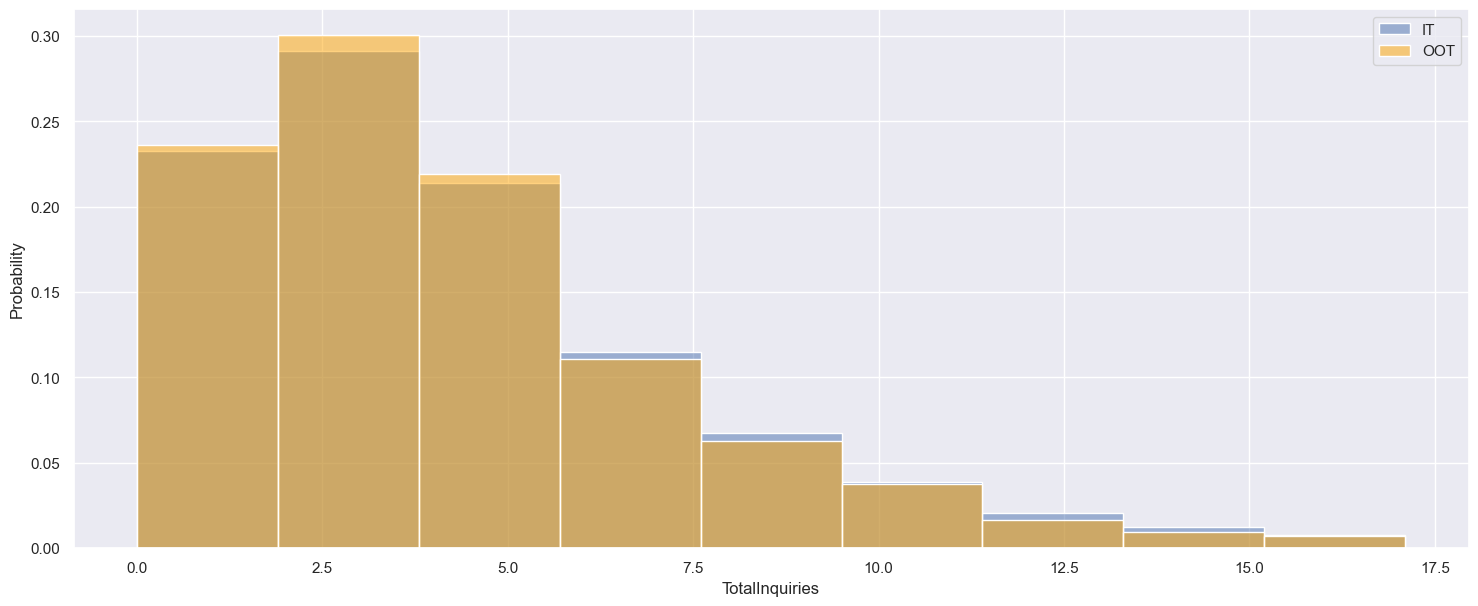

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,4.382528,3.0,0.0,71.0,2.0,6.0,4.150007,0.0,91.275681,46


Results for CurrentDelinquencies


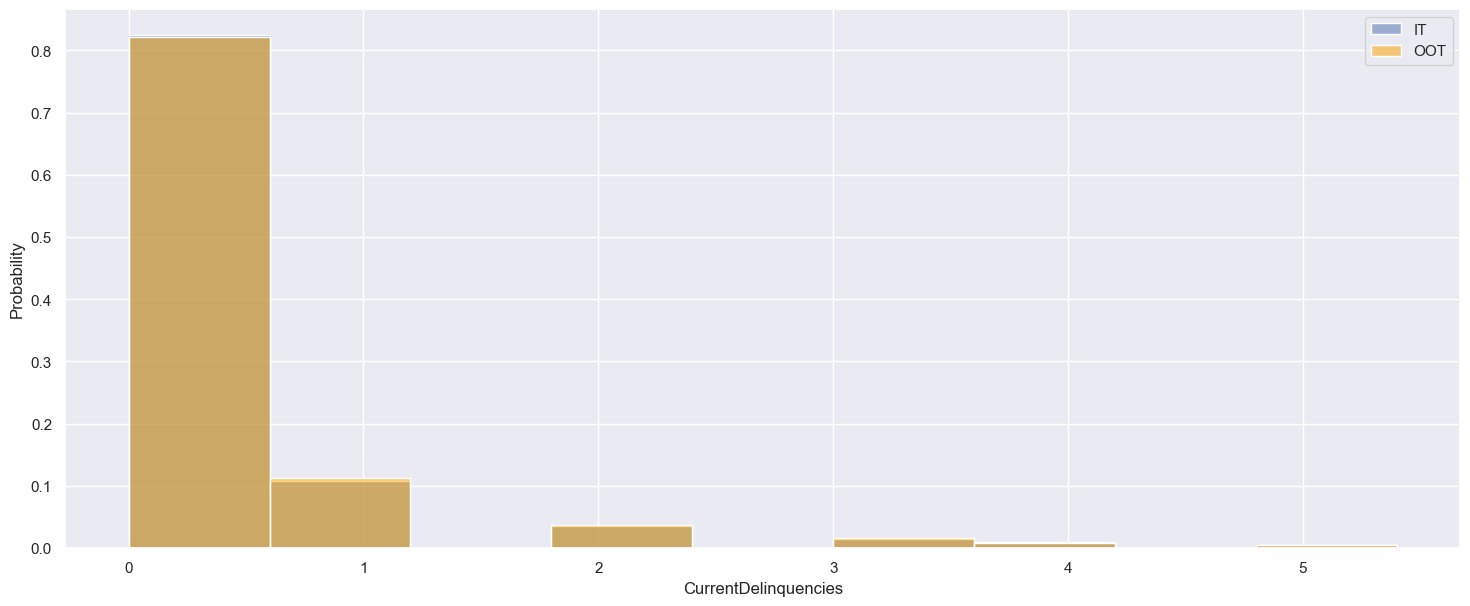

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,0.400012,0.0,0.0,24.0,0.0,0.0,1.234987,0.0,18.614234,22


Results for AmountDelinquent


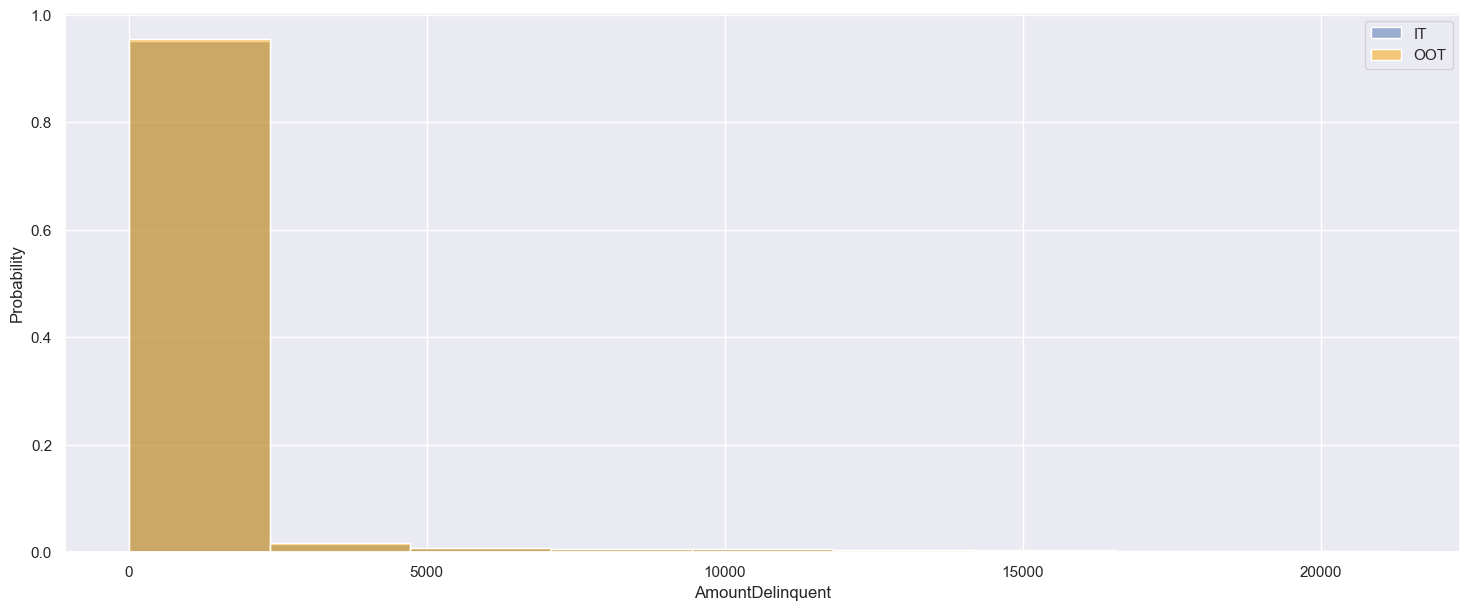

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,1030.348384,0.0,0.0,249209.0,0.0,0.0,6715.581776,0.0,15.558957,1893


Results for DelinquenciesLast7Years


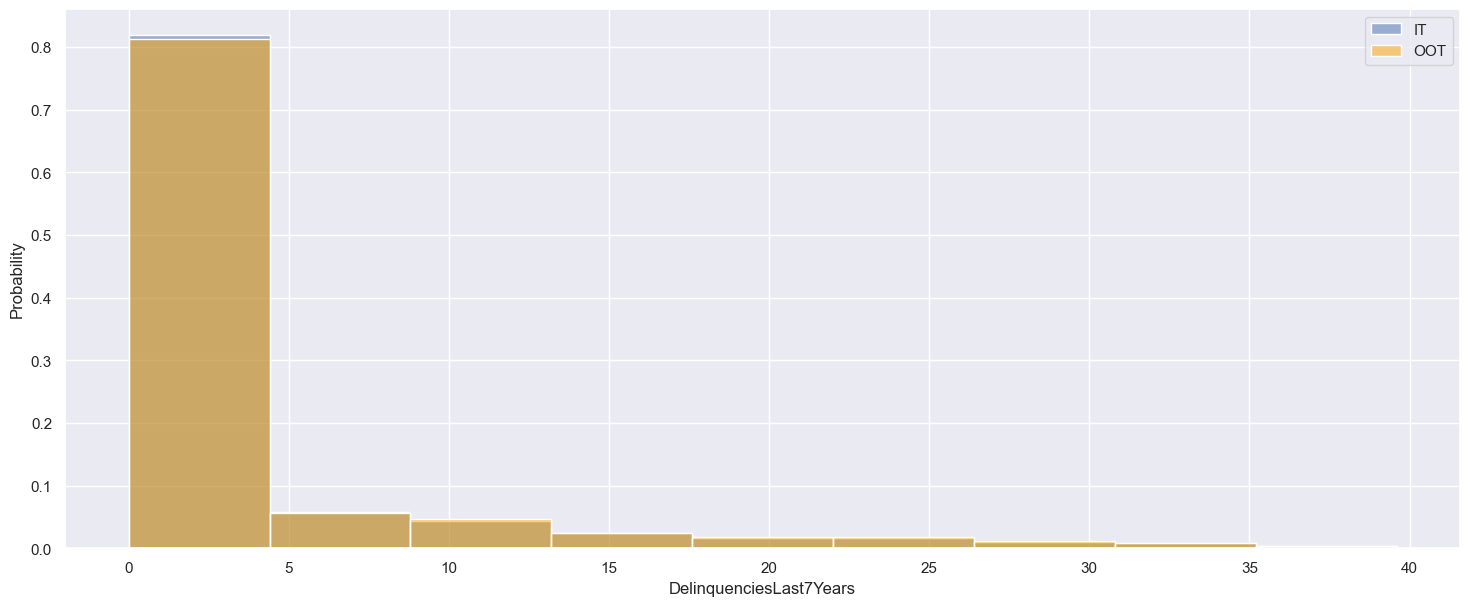

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,3.53176,0.0,0.0,99.0,0.0,2.0,8.866966,0.0,30.358509,83


Results for PublicRecordsLast10Years


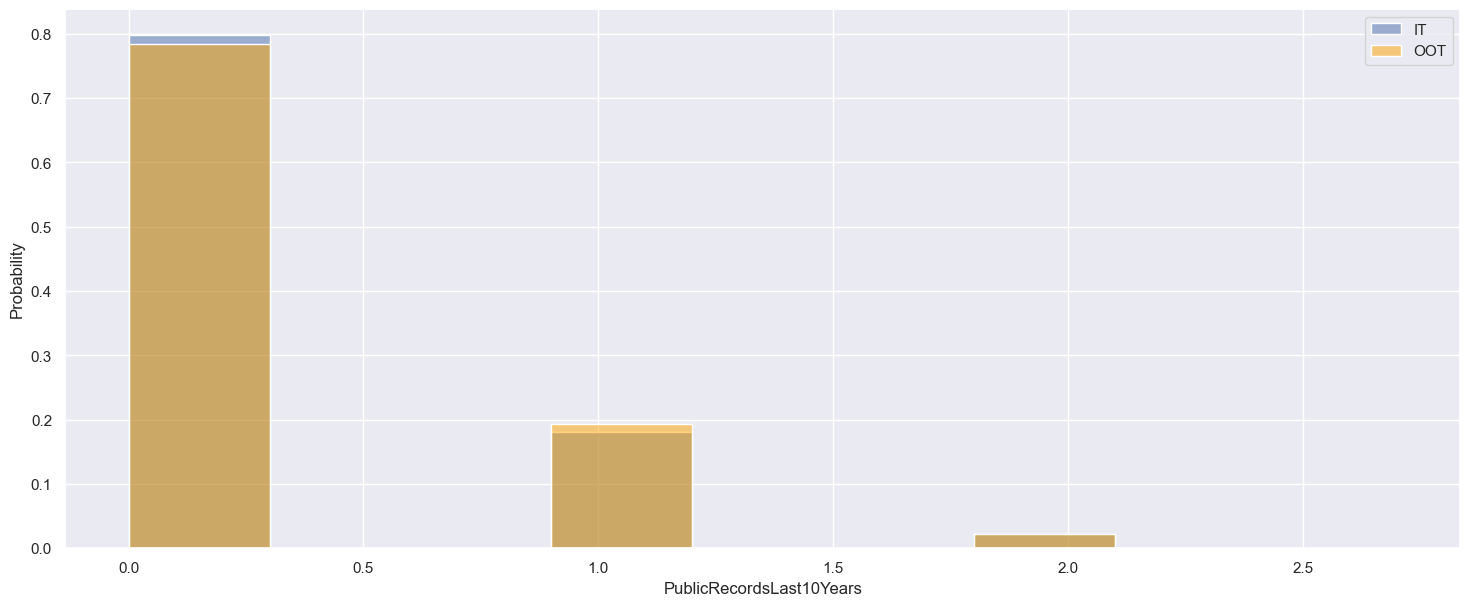

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,0.264908,0.0,0.0,12.0,0.0,0.0,0.630288,0.0,21.086713,12


Results for PublicRecordsLast12Months


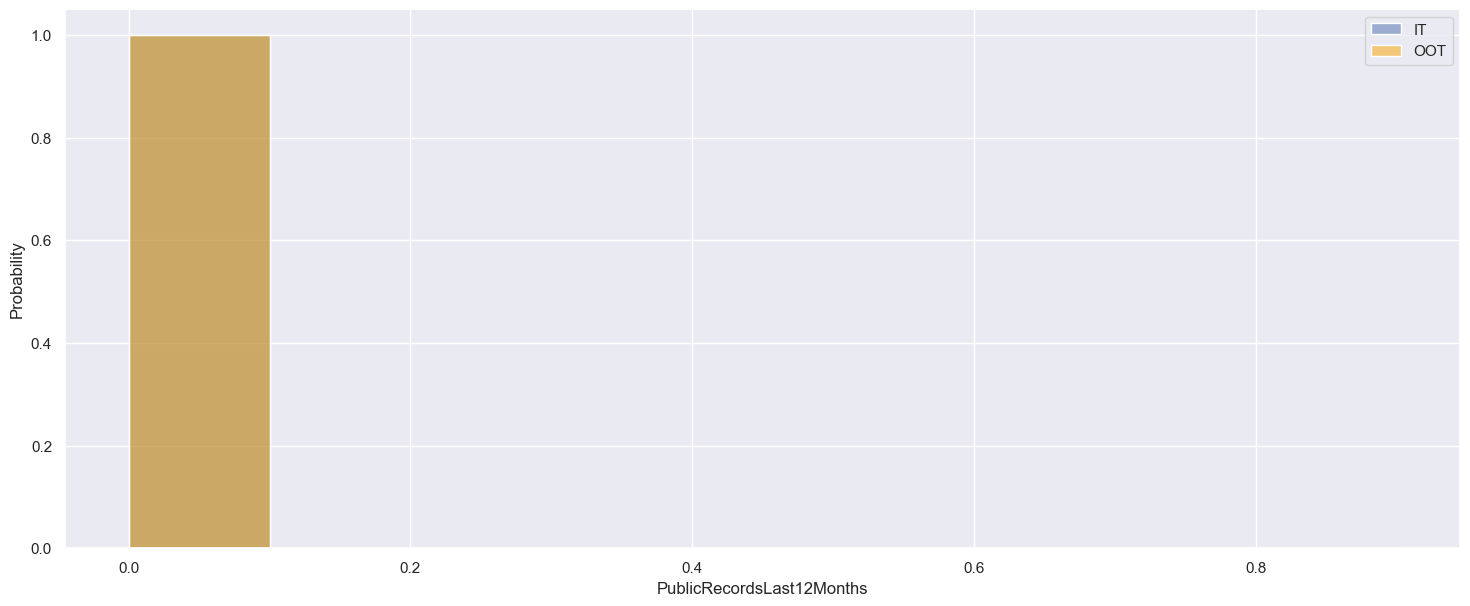

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,0.013893,0.0,0.0,3.0,0.0,0.0,0.128097,0.0,1.271561,4


Results for RevolvingCreditBalance


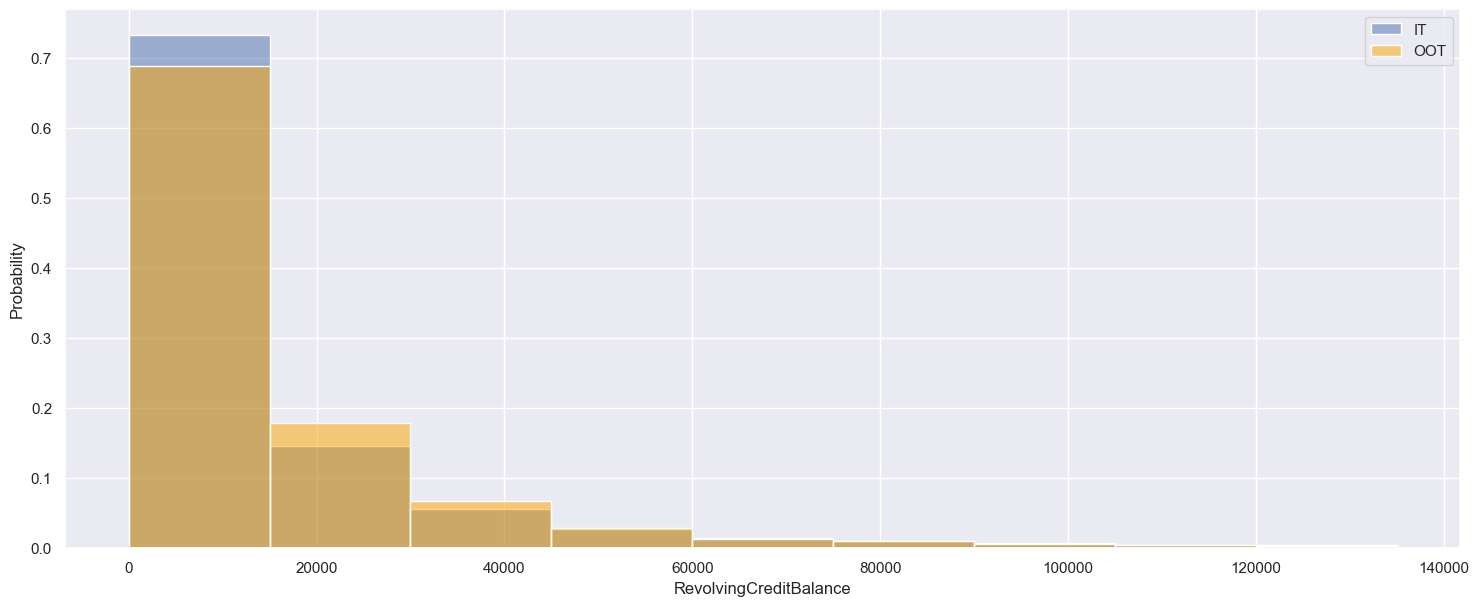

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,15975.778537,6606.0,0.0,879785.0,1964.5,16814.5,31902.850668,0.0,95.331724,11848


Results for BankcardUtilization


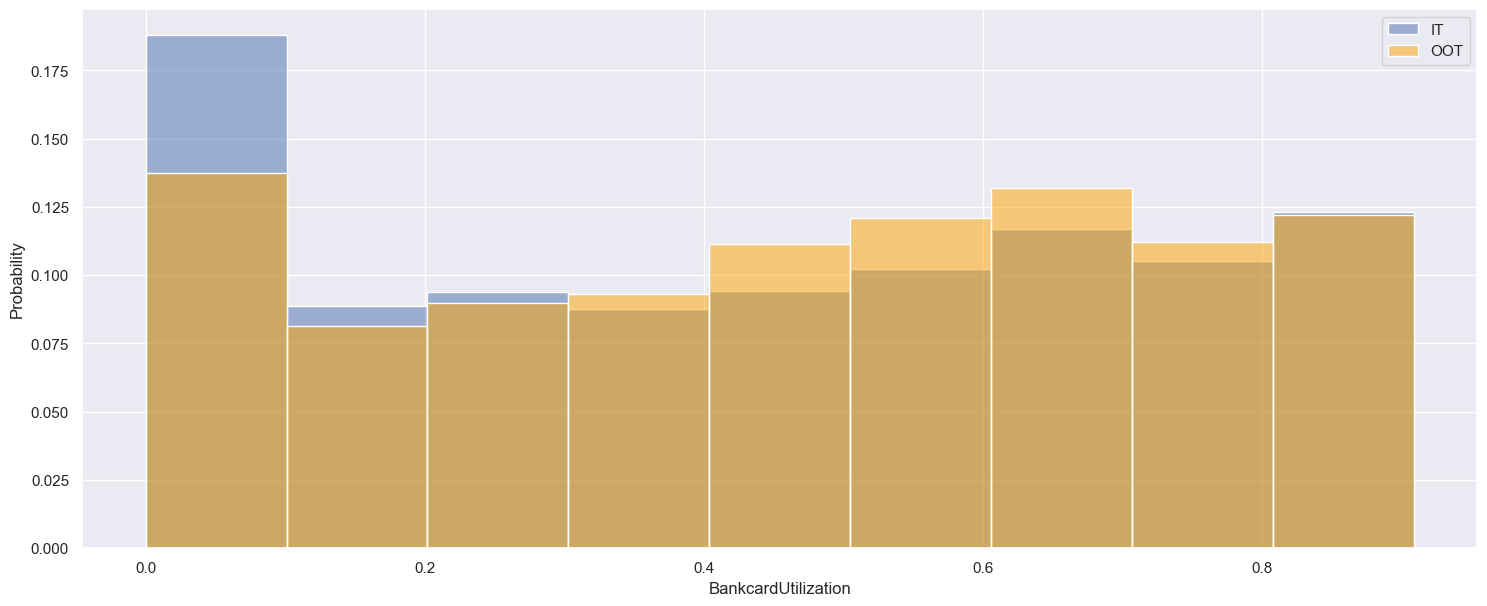

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,0.521266,0.55,0.0,2.5,0.23,0.82,0.329189,0.0,92.305881,134


Results for AvailableBankcardCredit


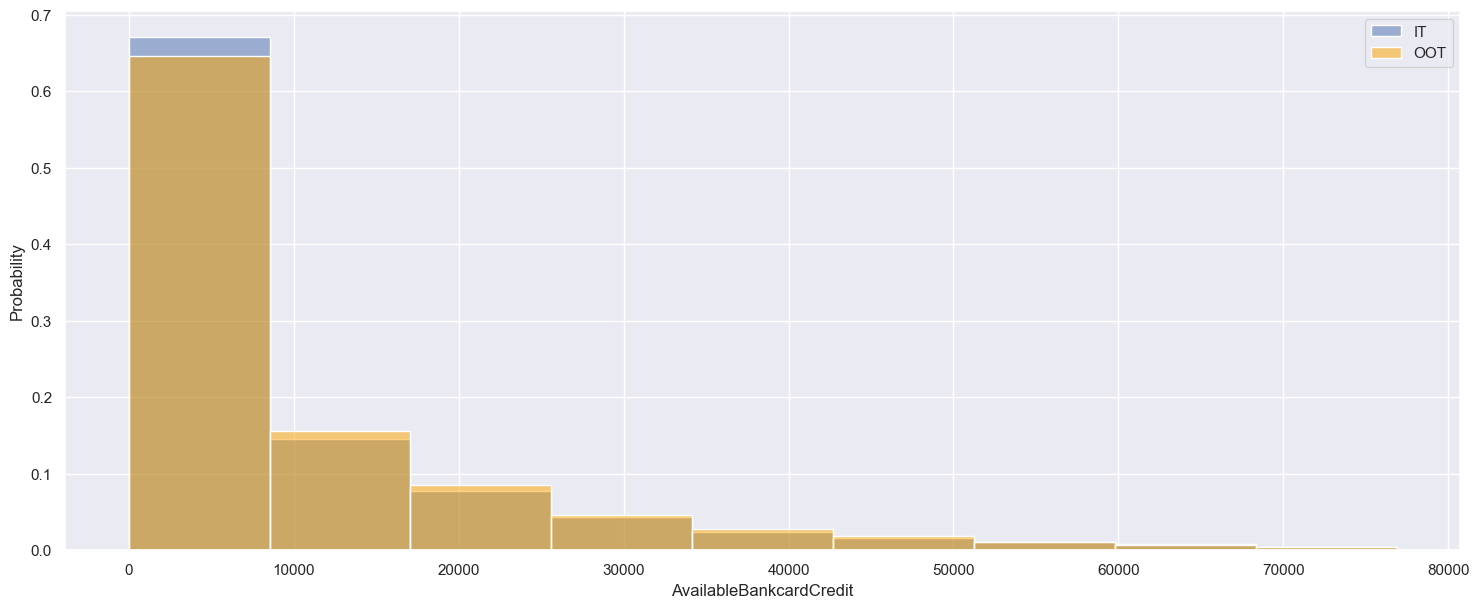

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,10711.684582,3779.0,0.0,412785.0,755.0,12908.0,18887.303459,0.0,94.919644,10190


Results for TotalTrades


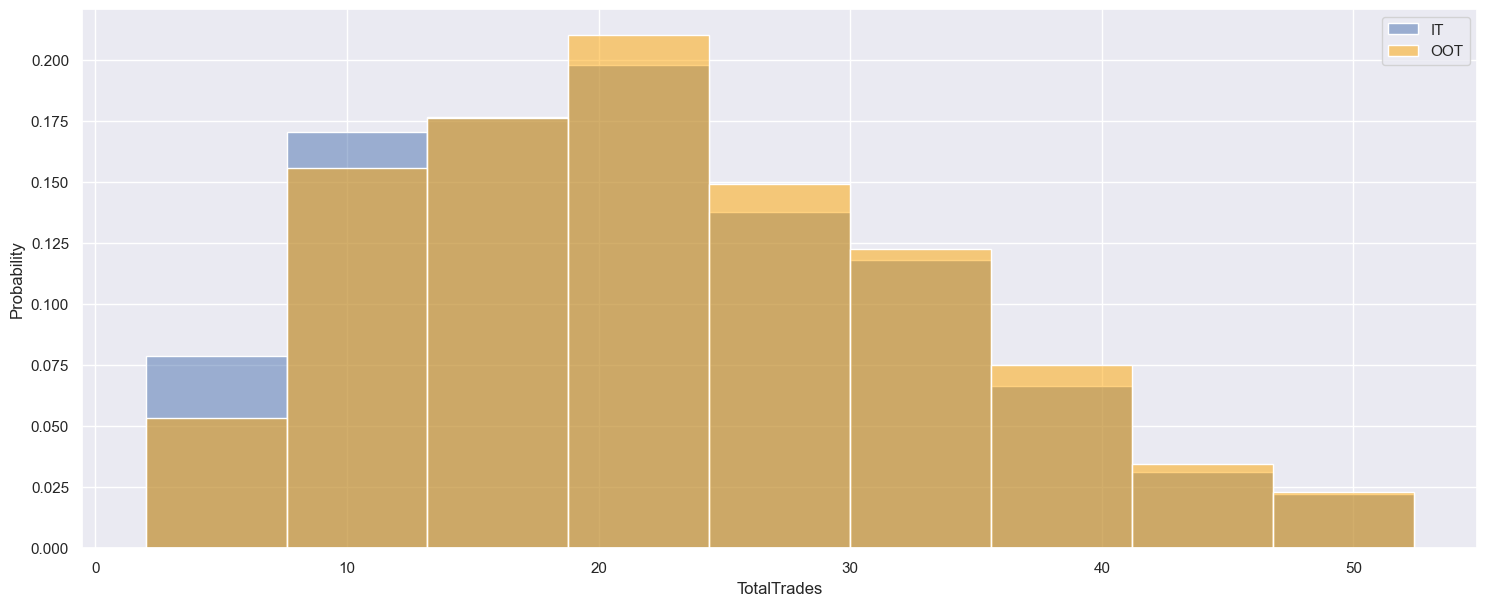

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,22.520575,21.0,1.0,118.0,14.0,30.0,12.107445,0.0,100.0,90


Results for TradesNeverDelinquent (percentage)


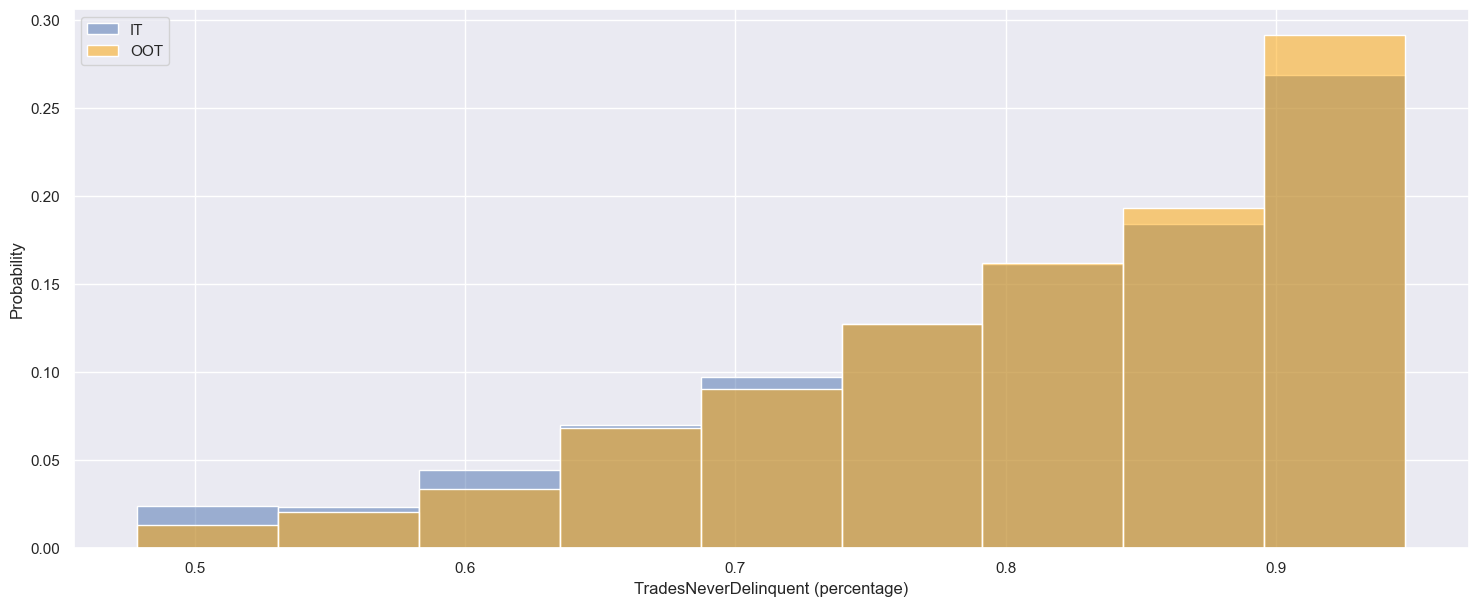

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,0.890626,0.94,0.2,1.0,0.82,1.0,0.132,0.0,100.0,71


Results for TradesOpenedLast6Months


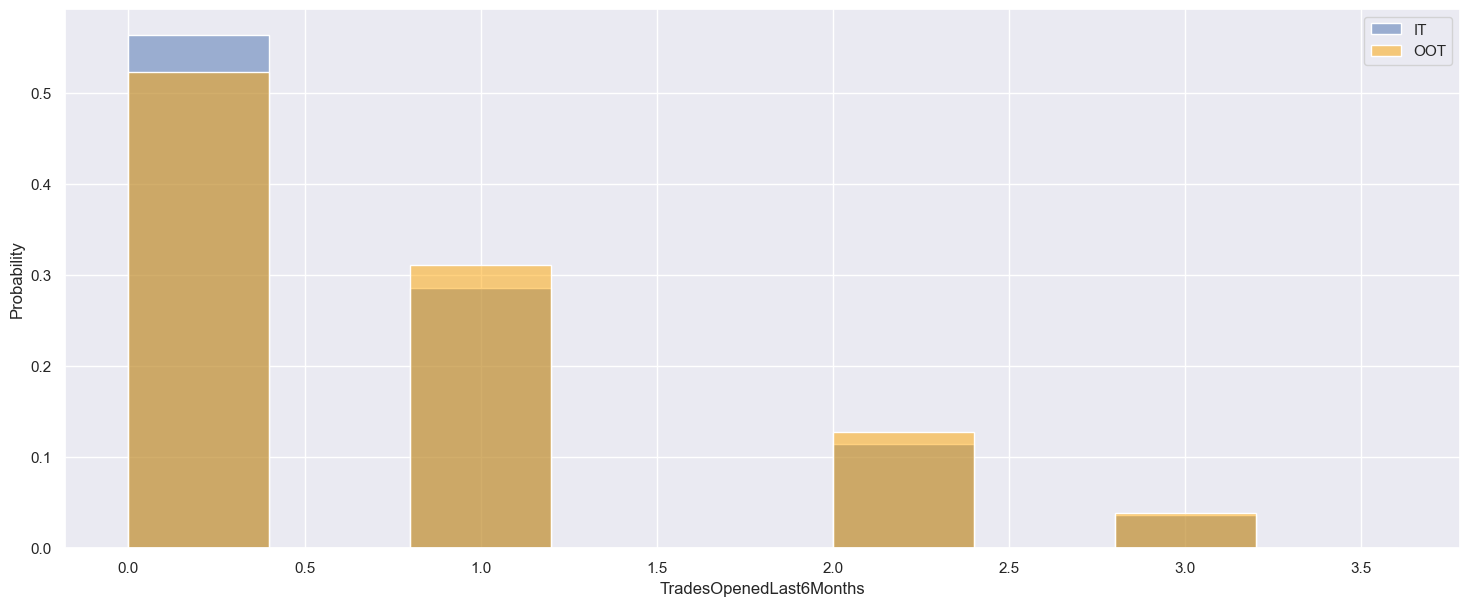

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,0.718432,0.0,0.0,20.0,0.0,1.0,1.048462,0.0,44.904927,14


Results for DebtToIncomeRatio


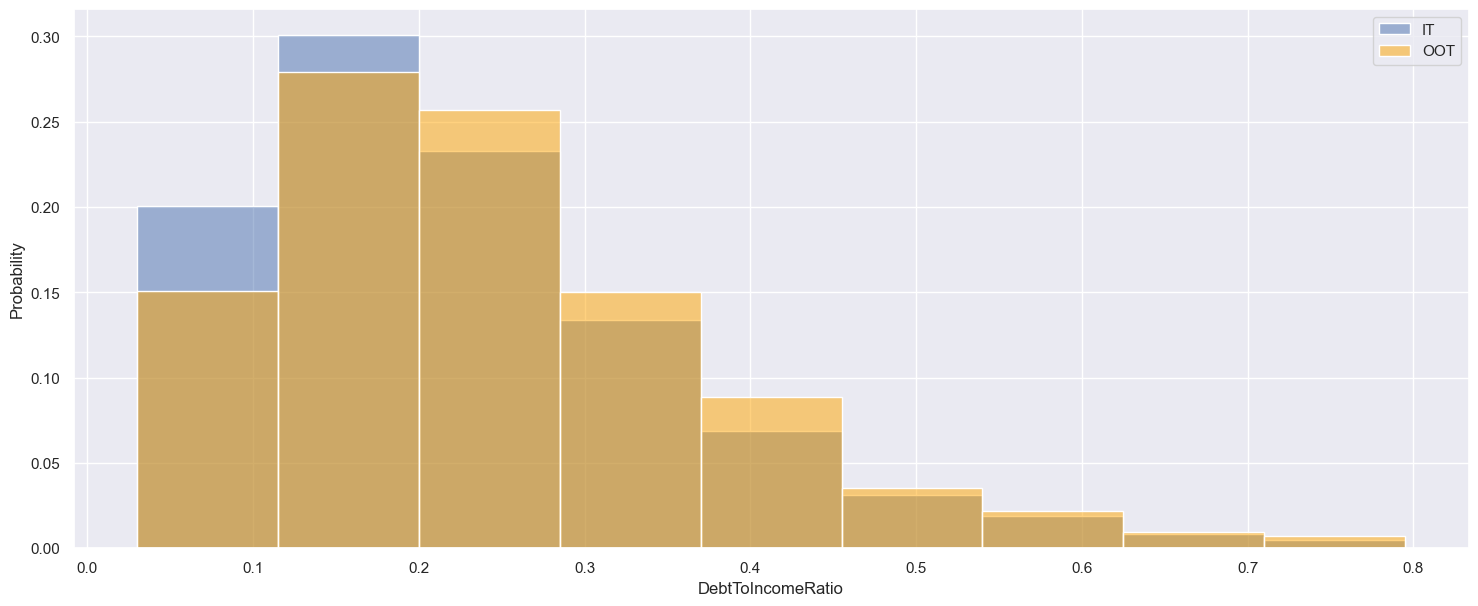

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,0.247142,0.2,0.0,10.01,0.13,0.3,0.3879,11.767822,99.976453,171


Results for StatedMonthlyIncome


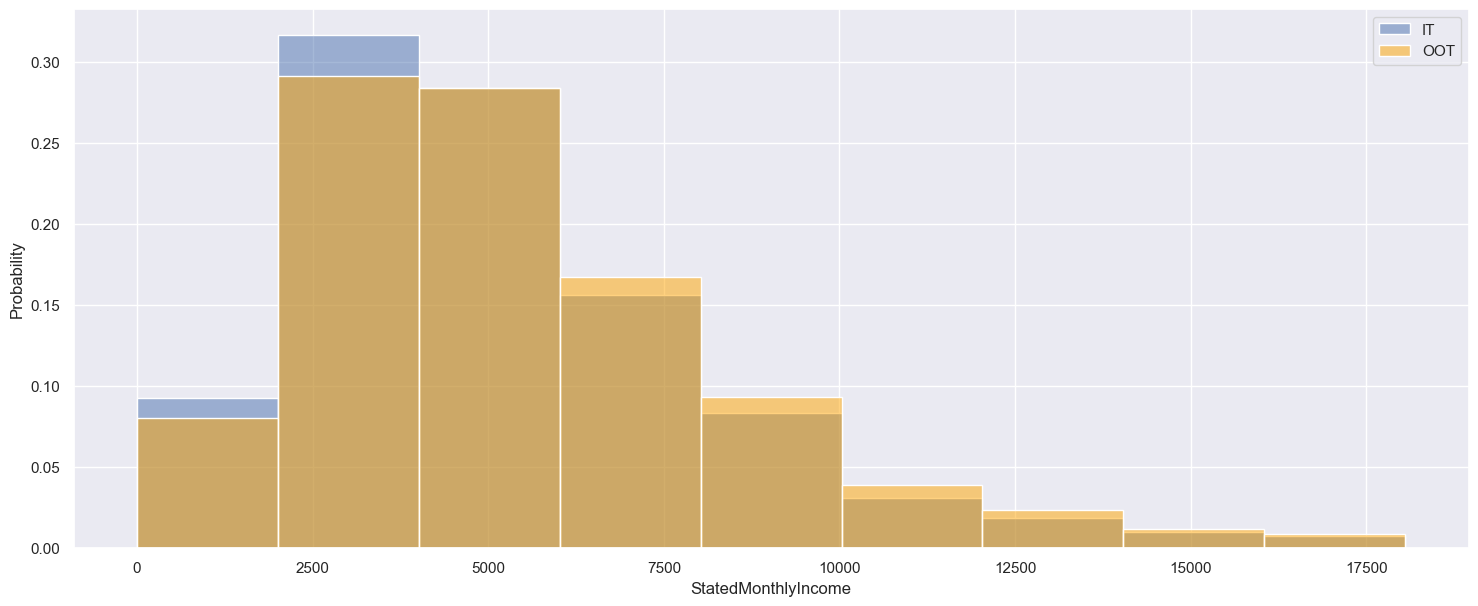

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,5516.876572,4583.333333,0.0,483333.333333,3100.0,6666.666667,6563.539084,0.0,98.545947,2861


Results for TotalProsperLoans


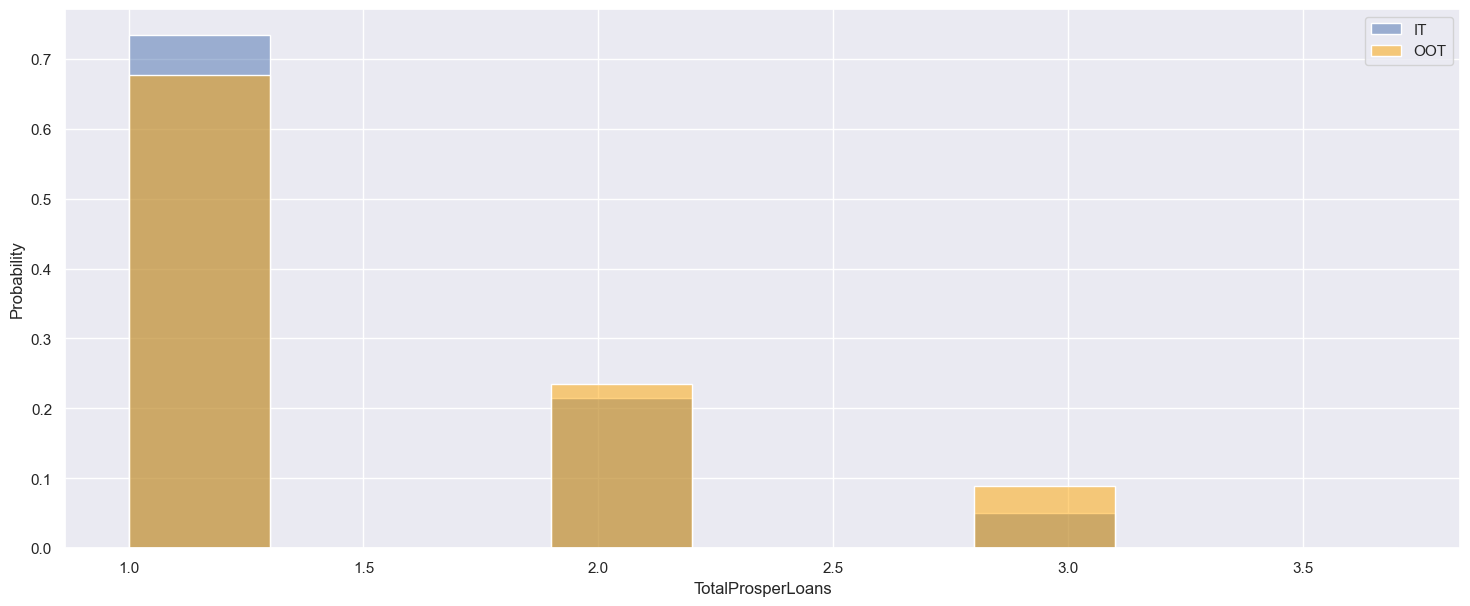

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,1.356018,1.0,0.0,7.0,1.0,2.0,0.663346,67.475128,99.994113,8


Results for TotalProsperPaymentsBilled


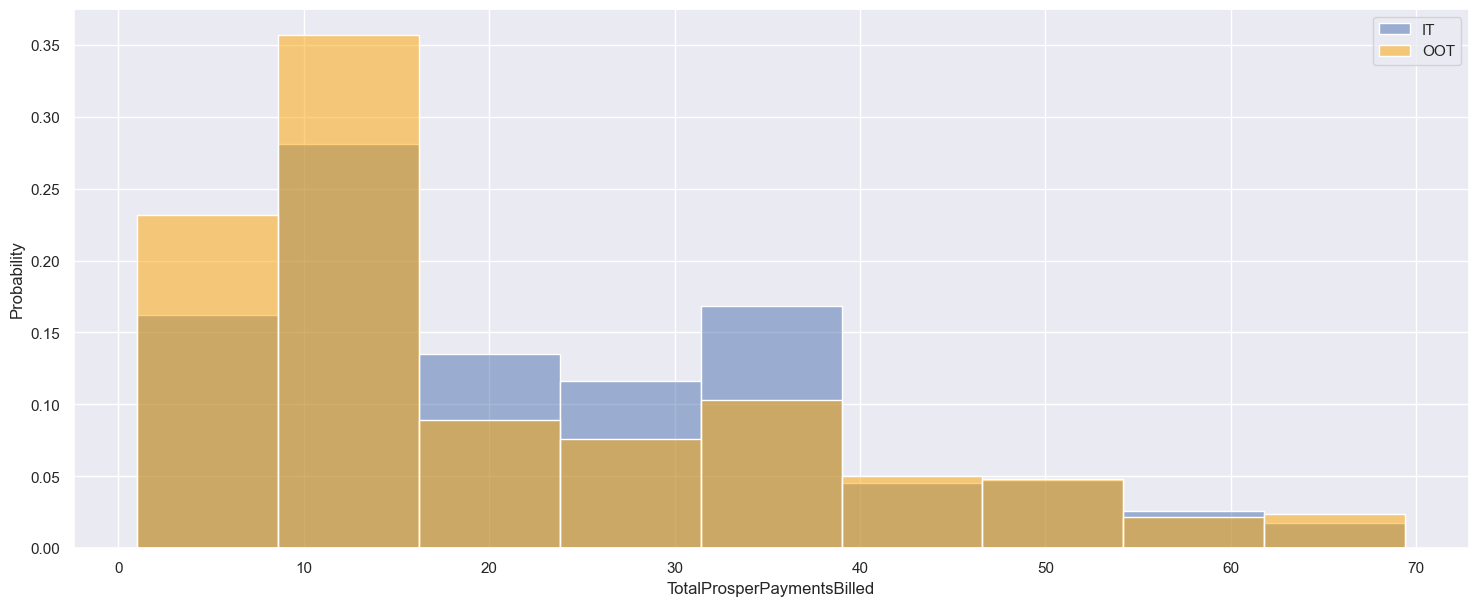

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,24.036018,20.0,0.0,103.0,10.0,35.0,17.195251,67.475128,99.894037,93


Results for OnTimeProsperPayments


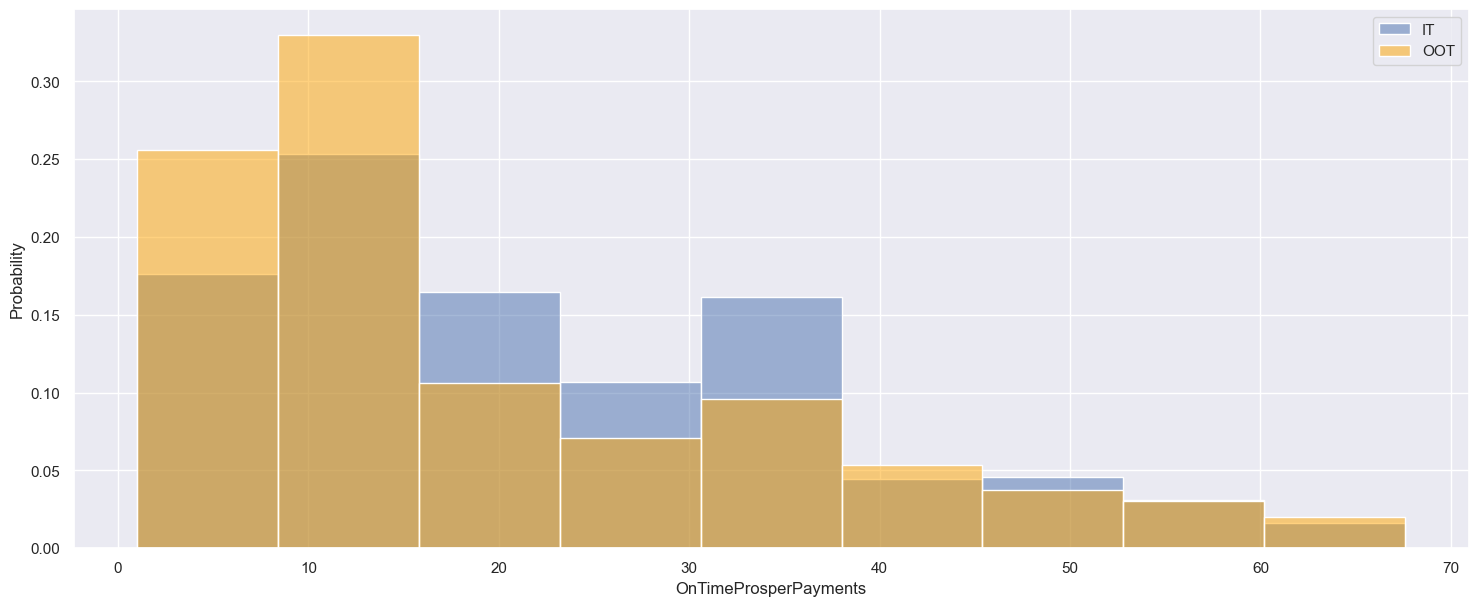

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,23.323258,19.0,0.0,103.0,10.0,34.0,16.78543,67.475128,99.882263,91


Results for ProsperPaymentsLessThanOneMonthLate


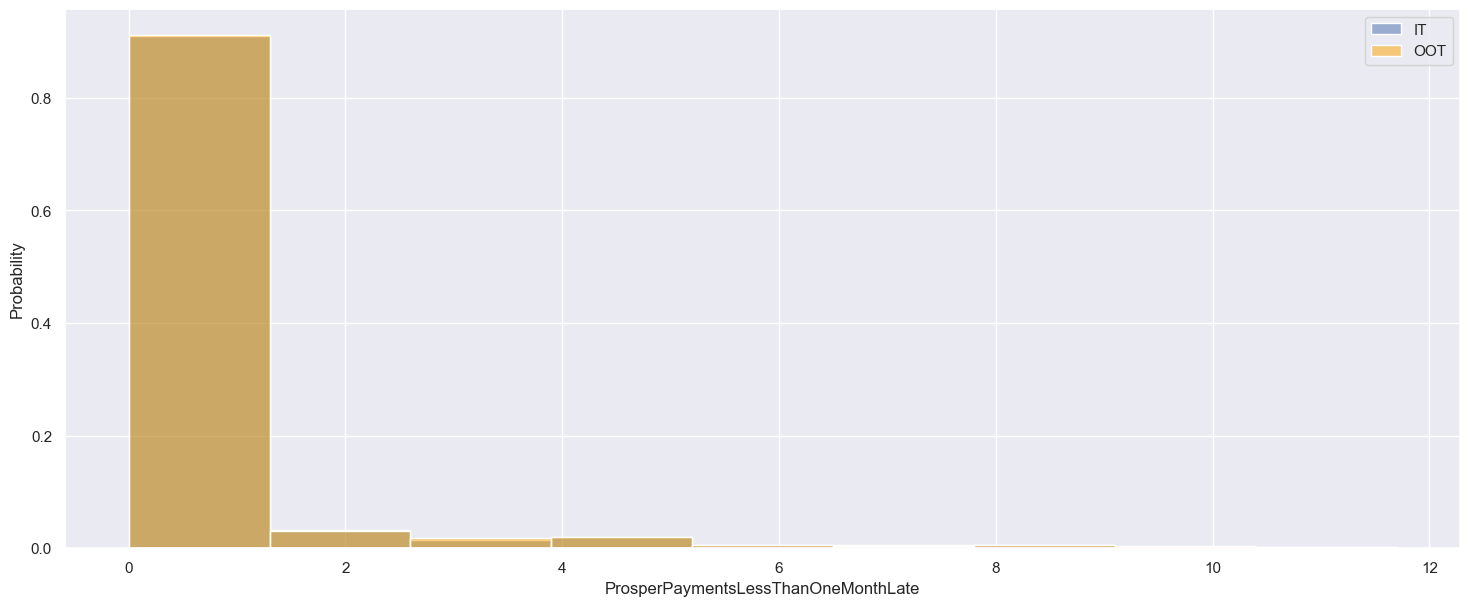

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,0.654661,0.0,0.0,28.0,0.0,0.0,2.355186,67.475128,73.420851,29


Results for ProsperPaymentsOneMonthPlusLate


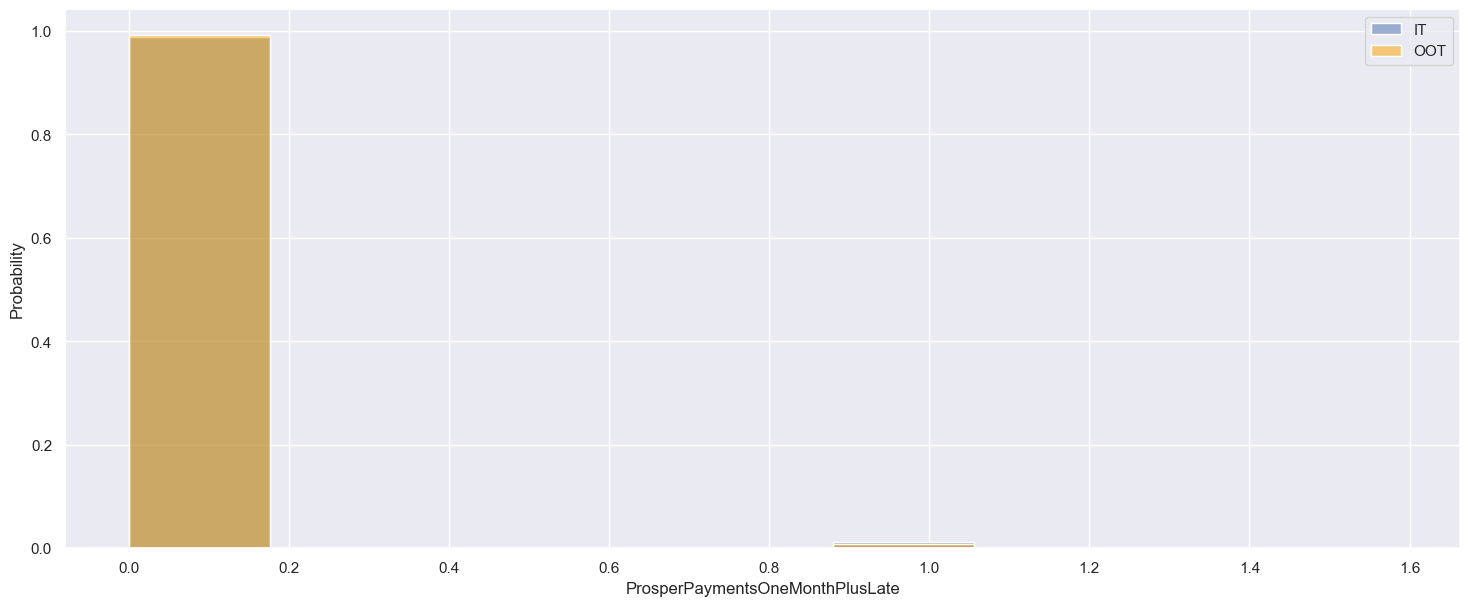

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,0.0581,0.0,0.0,21.0,0.0,0.0,0.5945,67.475128,68.210985,13


Results for ProsperPrincipalBorrowed


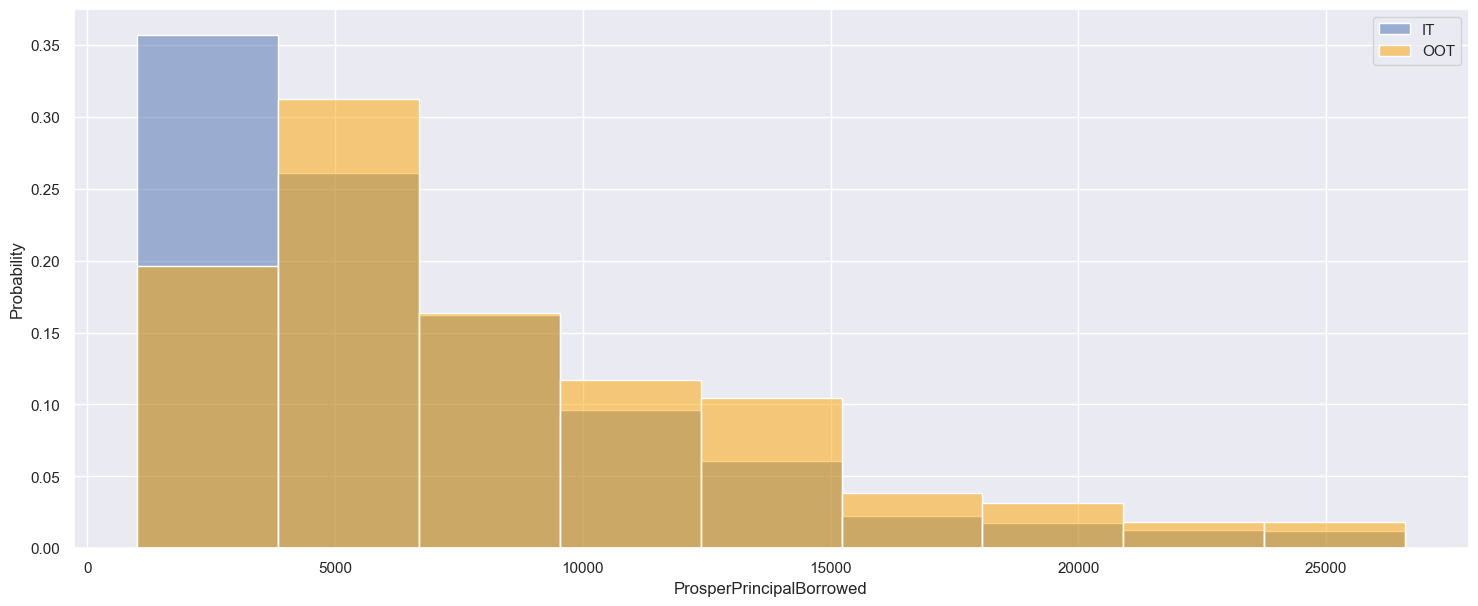

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,6928.957135,5000.0,0.0,57499.0,3000.0,9000.0,6010.11264,67.475128,99.994113,587


Results for ProsperPrincipalOutstanding


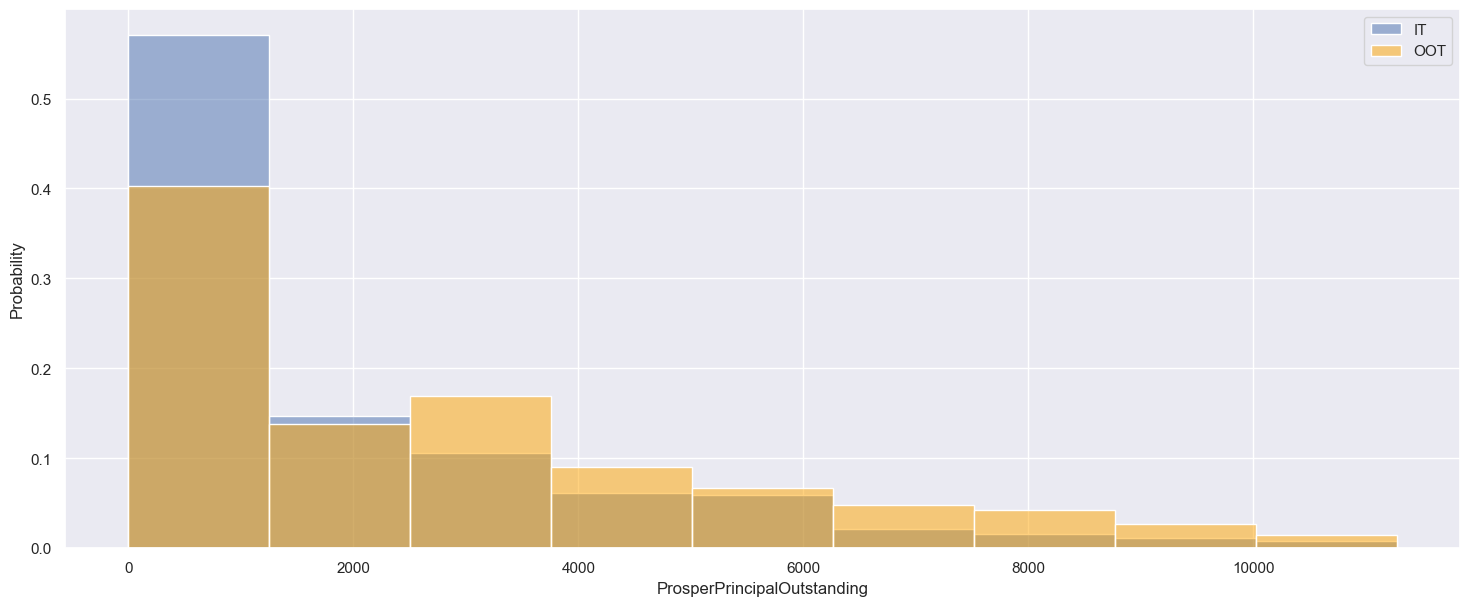

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,1961.604362,826.66,0.0,21523.79,0.0,3044.38,2726.631678,67.475128,90.457409,3336


Results for ScorexChangeAtTimeOfListing


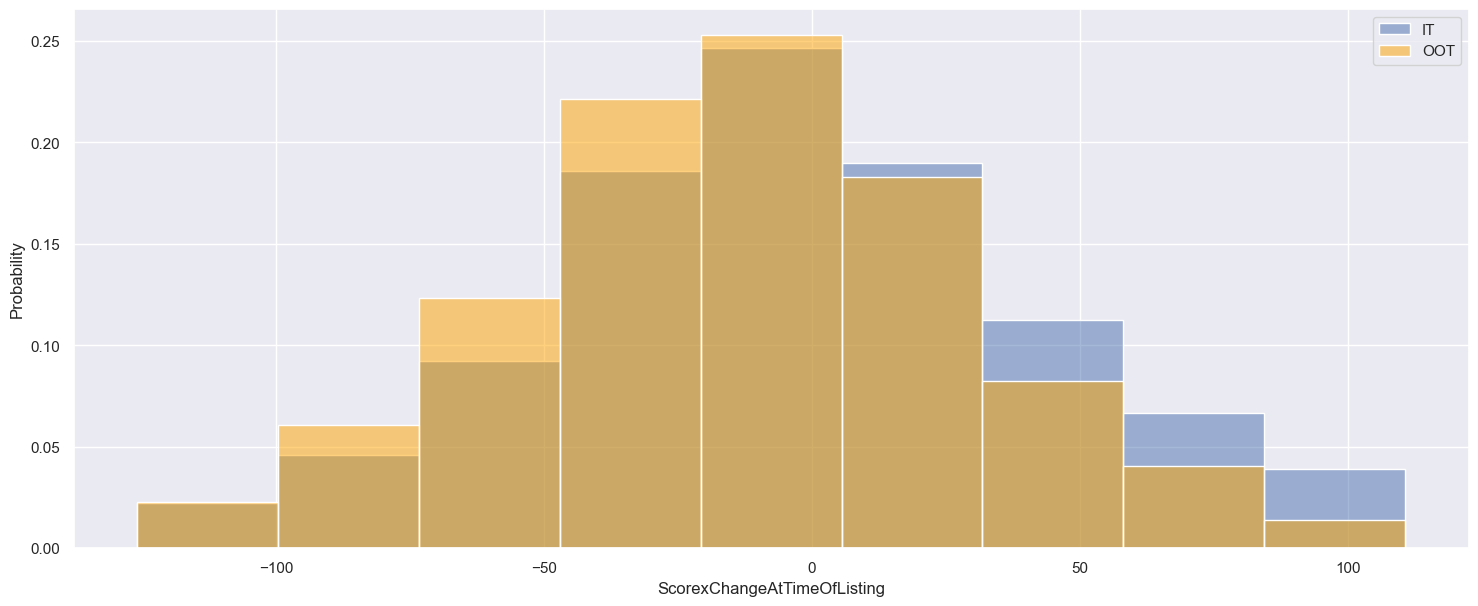

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,-0.485636,-3.0,-209.0,257.0,-32.0,29.0,53.222908,67.622299,99.752752,331


Results for LoanOriginalAmount


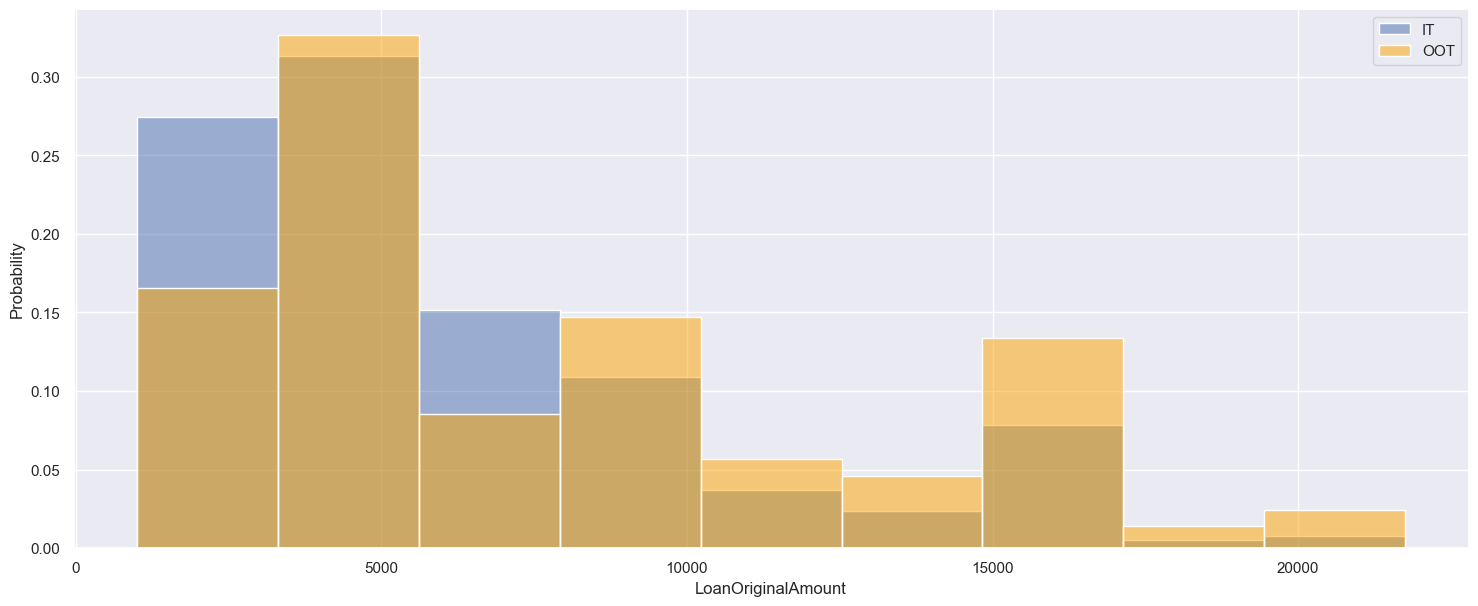

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,6411.536999,5000.0,1000,25000,3000.0,8000.0,4651.258896,0.0,100.0,723


Results for PercentFunded


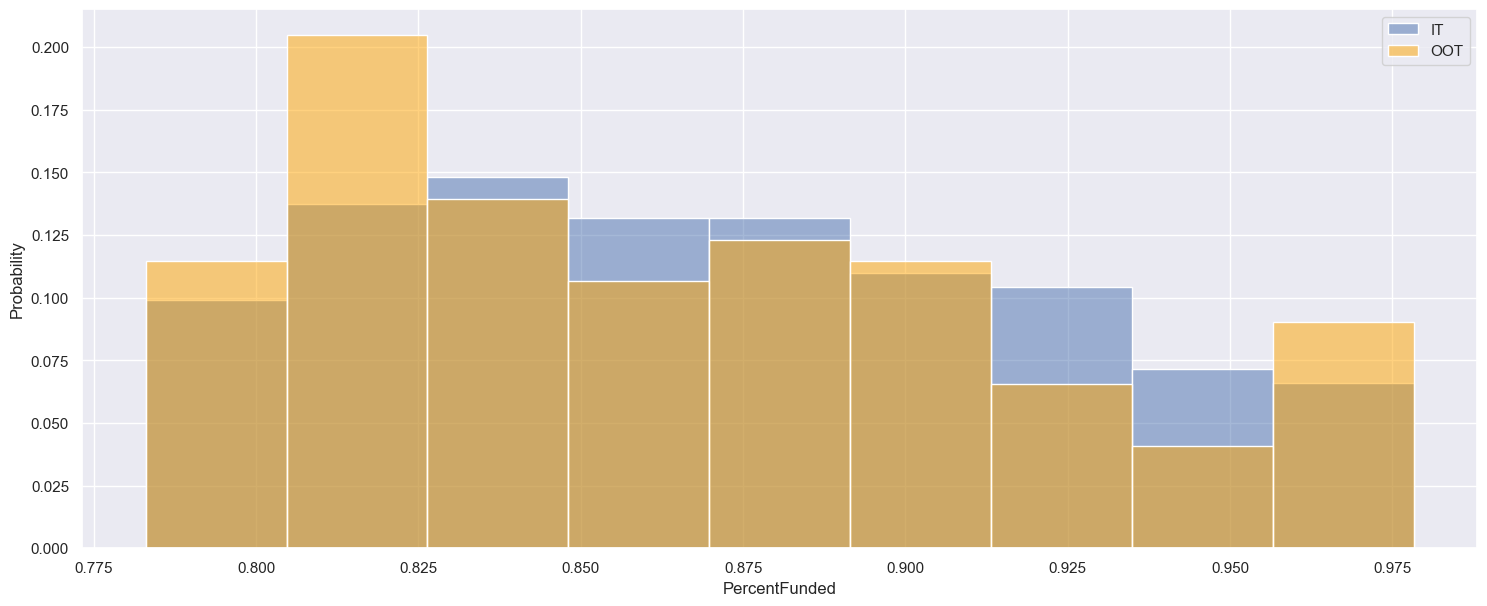

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,0.995923,1.0,0.7,1.0,1.0,1.0,0.03035,0.0,100.0,336


Results for Recommendations


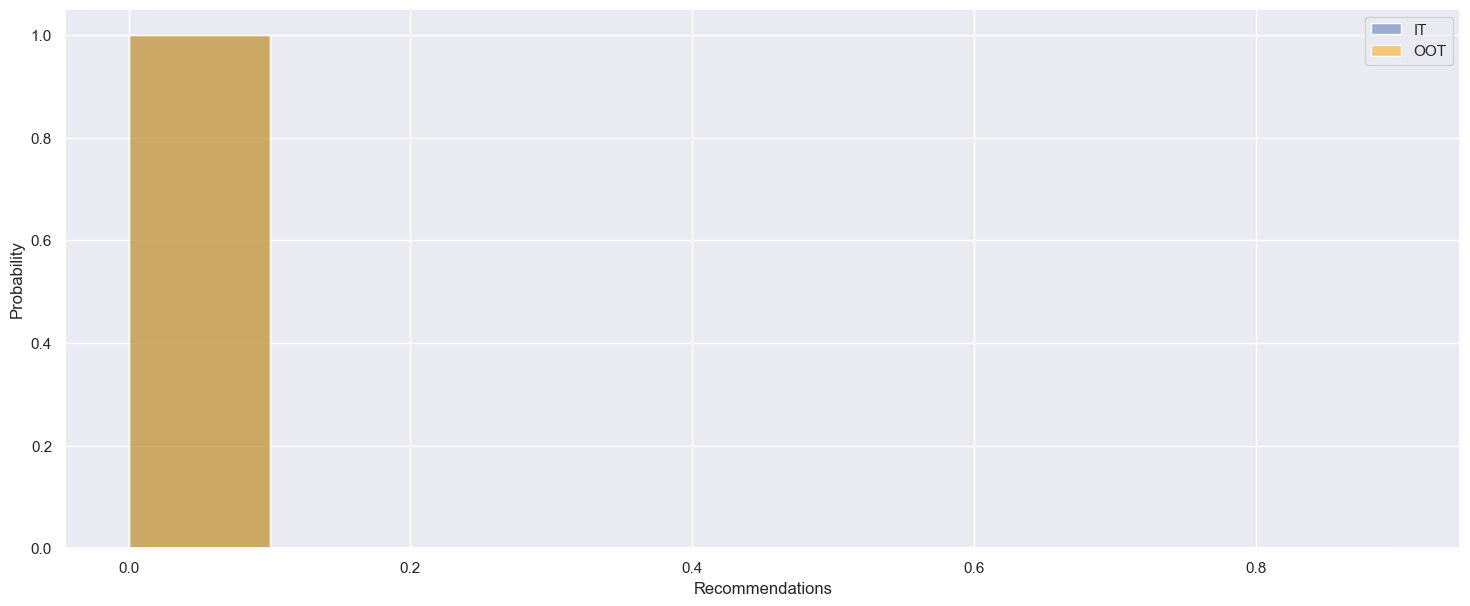

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,0.039501,0.0,0,18,0.0,0.0,0.303488,0.0,3.108259,7


In [31]:
for f in num_features:
    print(f"Results for {f}")
    res = desc_num(df, df_oot, f)
    display(res)

**TODO 2** Crea una función que cumpla con la funcionalidad descrita en la cabecera de la función desc_cat

In [32]:
from collections import Counter

def desc_cat(df, df_oot, col):
    """Function that returns a custom descriptive for the categorical variable. It returns:
        - # Unique entires, % Unique entries, top frequent entry, frequency of top, NA rate
        - Histogram plot
        - Stability plot
    
    Args:
        df: Pandas DataFrame with the in time input data
        df_oot: Pandas DataFrame with the out of time input data
        col: Name of the column with the feature under study
        
    Returns:
        Dictionary that contains the main statistics of the feature, 
        also shows both the histogram and stability plots
    """
    nunique = df[col].nunique()
    unique = 100. * df[col].nunique()/len(df)
    top = df[col].mode().squeeze()
    na = 100. * df[col].isna().sum() / len(df)
    freq = 100. * df[col].value_counts()[:10] / len(df)
    
    df[col].hist(bins=20)
    
    return


In [33]:
#### EJECUTA AQUÍ LA FUNCIÓN desc_cat para todas las variable categóricas

### Correlation Review

/var/folders/41/_wb9xl2j5mx33x3_7jr_cvx00000gp/T/ipykernel_39676/28713058.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot: >

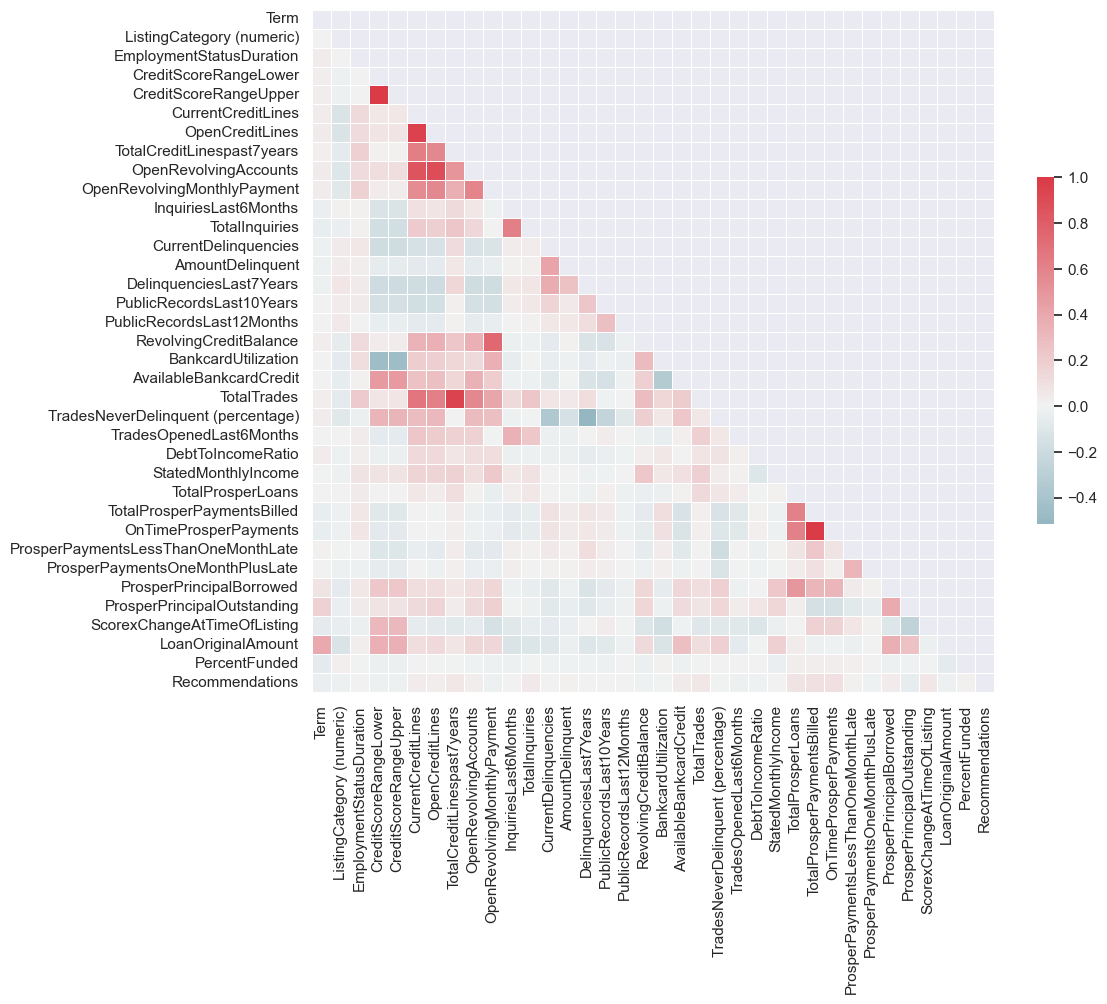

In [34]:
corr = df[num_features].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [35]:
corr[corr!=1.].max().sort_values().tail(5)

TotalTrades                   0.942083
OpenCreditLines               0.957426
CurrentCreditLines            0.957426
OnTimeProsperPayments         0.988512
TotalProsperPaymentsBilled    0.988512
dtype: float64

#### Get pairs of highly correlated features

In [36]:
corr_TH = 0.75
n_corr_list = []
corr_feats_list = []

In [37]:
for f in num_features:
    corr_f = corr[f][[col for col in num_features if col!=f]]
    corr_f_abs = corr_f.abs()
    corr_ht_th = corr_f_abs[corr_f_abs>corr_TH]
    n_corr_list.append(corr_ht_th.shape[0])
    corr_feats_list.append(corr_ht_th)
    
corr_relations = [(feat, n, feats_corr) for n, feats_corr, feat in zip(n_corr_list, corr_feats_list, num_features) if n>0]
corr_relations

[('CreditScoreRangeLower',
  1,
  CreditScoreRangeUpper    1.0
  Name: CreditScoreRangeLower, dtype: float64),
 ('CreditScoreRangeUpper',
  1,
  CreditScoreRangeLower    1.0
  Name: CreditScoreRangeUpper, dtype: float64),
 ('CurrentCreditLines',
  2,
  OpenCreditLines          0.957426
  OpenRevolvingAccounts    0.853989
  Name: CurrentCreditLines, dtype: float64),
 ('OpenCreditLines',
  2,
  CurrentCreditLines       0.957426
  OpenRevolvingAccounts    0.888447
  Name: OpenCreditLines, dtype: float64),
 ('TotalCreditLinespast7years',
  1,
  TotalTrades    0.942083
  Name: TotalCreditLinespast7years, dtype: float64),
 ('OpenRevolvingAccounts',
  2,
  CurrentCreditLines    0.853989
  OpenCreditLines       0.888447
  Name: OpenRevolvingAccounts, dtype: float64),
 ('TotalTrades',
  1,
  TotalCreditLinespast7years    0.942083
  Name: TotalTrades, dtype: float64),
 ('TotalProsperPaymentsBilled',
  1,
  OnTimeProsperPayments    0.988512
  Name: TotalProsperPaymentsBilled, dtype: float64),
 ('

### Recommended tool: pandas-profiling

In [42]:
!pip install "pandas_profiling[notebook]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.3/315.3 kB 8.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 19.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 20.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 694.7/694.7 kB 15.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.6/197.6 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.4/134.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 21.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 7.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.1/384.1 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 21.9 MB/s eta 0:00:0000:0100:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=d7beae68b3dc2721a3cbc8c7d76ac2b2b195a44376131d60c494070f466106a3
  Stored in directory: /Users/juan/Library/Caches/pip/wheels/1d/05/04/c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2


In [43]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df[features], minimal=True)

In [44]:
# display(profile)

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

ImportError: cannot import name '_check_savefig_extra_args' from 'matplotlib.backend_bases' (/Users/juan/opt/anaconda3/envs/AINE/lib/python3.9/site-packages/matplotlib/backend_bases.py)

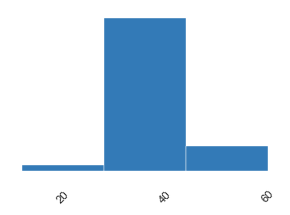

In [46]:
# exporta el profiling a un fichero .html
profile.to_file(output_file="output.html")

## IV / WoE


In [47]:
#visualization functions
def capture_df(feat_col, input_slider, n_bins, df, target_col):
    """
    Handles the type of the data to generate the intermediate datadframe
    """
    if df[feat_col].dtype in [int, float, np.number]:
        return df_vol_br_num(feat_col, input_slider, n_bins, df, target_col)
    else:
        return df_vol_br_cat(feat_col, input_slider, n_bins, df, target_col)

#capture volume / BR df for numerical variables
def df_vol_br_num(feat_col, input_slider, n_bins, df, obj_col):
    """
    Generate the intermediate dataframe with number of observations and 
    number of bads per bin. Specific for numerical features.
    """
    #get the numeric input from the dual slider
    perc_sliders = [v/100. for v in input_slider]
    var_lims = df[feat_col].quantile([perc_sliders[0], perc_sliders[1]]).values
    v_min, v_max = var_lims[0], var_lims[1]
    #filter the dataset using the slider input
    df_cut = df.loc[(df[feat_col] <= v_max) & (df[feat_col] >= v_min)][[obj_col, feat_col]]
    #number of cuts = minumum of n_bins, number of unique values of the variable
    n_cuts = min(int(n_bins), df_cut[feat_col].nunique())
    cuts = [c for c in np.linspace(v_min, v_max, n_cuts + 1)]
    if cuts[-1] < v_max:
        cuts.append(v_max)
    cut_col = feat_col + '_'
    df_cut[cut_col] = pd.cut(df_cut[feat_col], cuts, include_lowest=True)
    #generate aggregated values
    N = df_cut.groupby(cut_col)[feat_col].count().values
    TR = df_cut.groupby(cut_col)[obj_col].mean().values
    cuts = df_cut.groupby(cut_col)[feat_col].count().index.astype(str).values
    #handle NA entries
    if df[feat_col].isna().sum() > 0:
        N = np.append(([df[feat_col].isna().sum()]), N)
        TR = np.append(([df.loc[df[feat_col].isna()][obj_col].mean()]), TR)
        cuts =  np.append(['NA'], cuts)
    #generate global transformation rate
    return (pd.DataFrame({'cuts': cuts,
                         'N': N,
                         'BR': TR}), df_cut[obj_col].mean())

#capture volume / BR df for categorical variables
def df_vol_br_cat(feat_col, input_slider, n_bins, df, target_col):
    """
    Generate the intermediate dataframe with number of observations and 
    number of bads per bin. Specific for categorical features.
    """
    #pick top n_bins levels by volume
    cut_levels = df.groupby(feat_col)[feat_col].count().sort_values(ascending=False)[:int(n_bins)].index.values.tolist()
    df_cut = df.loc[df[feat_col].isin(cut_levels)]
    #capture volumes
    N = df_cut.groupby(feat_col)[feat_col].count().values
    #capture transformations
    TR = df_cut.groupby(feat_col)[target_col].mean().values
    return (pd.DataFrame({'cuts': df_cut.groupby(feat_col)[feat_col].count().index.astype(str).values,
                         'N': N,
                         'BR': TR}), df_cut[target_col].mean())


def output_graph_update(feat_col, input_slider, n_bins, df, obj_col):
    """
    Generate the plotly plot showing the visualization of the intermediate 
    dataframe with volume and bad rate per bin.
    """
    #get the df with volume and bad rate
    df_tr, avg_tr = capture_df(feat_col, input_slider, n_bins, df, obj_col)
    #line represents transformation rate
    tr_line = go.Scatter(x = df_tr.cuts,
                         y = df_tr.BR,
                         yaxis = 'y2',
                         name = 'BR')
    #bar represents volume @ cut
    vol_bars = go.Bar(x = df_tr.cuts,
                      y = df_tr.N,
                      name = 'Volume')
    #avg line
    avg_line = go.Scatter(x = df_tr.cuts,
                          y = np.repeat(avg_tr, df_tr.shape[0]),
                          yaxis = 'y2',
                          name = 'AVG BR',
                          line = dict(
                              color = ('rgb(205, 0, 0)')
                                     )
                         )
    #small layout
    layout = go.Layout(
            title = 'BR for ' + feat_col,
            yaxis = dict(title = 'Volume',
                         range = [0, max(df_tr.N)]),
            yaxis2 = dict(title = 'BR',
                         overlaying='y',
                         side='right',
                         range = [0, max(df_tr.BR) + 0.05*max(df_tr.BR)])

        )
    return {'data': [vol_bars, tr_line, avg_line],
            'layout': layout}

In [48]:
# Ejemplo de una variable cortada en buckets
#feat = "CreditScoreRangeLower"
feat = "CreditScoreRangeLower"
df_buckets, avg_ratio = df_vol_br_num(feat, [0, 95], 5, df,'bad')
df_buckets

,cuts,N,BR
0,"(599.999, 640.0]",2950,0.083729
1,"(640.0, 680.0]",4782,0.070682
2,"(680.0, 720.0]",4302,0.063459
3,"(720.0, 760.0]",2900,0.054138
4,"(760.0, 800.0]",1523,0.024294


In [49]:
df_buckets["Bad"] = df_buckets["N"] * df_buckets["BR"]
df_buckets["Good"] = df_buckets["N"] - df_buckets["Bad"]

n_bads = df_buckets["Bad"].sum()
n_goods = df_buckets["Good"].sum()

df_buckets["Dist_Bad"] = df_buckets["Bad"] / n_bads
df_buckets["Dist_Good"] = df_buckets["Good"] / n_goods
df_buckets

,cuts,N,BR,Bad,Good,Dist_Bad,Dist_Good
0,"(599.999, 640.0]",2950,0.083729,247.0,2703.0,0.234791,0.175463
1,"(640.0, 680.0]",4782,0.070682,338.0,4444.0,0.321293,0.288478
2,"(680.0, 720.0]",4302,0.063459,273.0,4029.0,0.259506,0.261538
3,"(720.0, 760.0]",2900,0.054138,157.0,2743.0,0.149240,0.178059
4,"(760.0, 800.0]",1523,0.024294,37.0,1486.0,0.035171,0.096462


Definición de IV:
$$
IV = \sum_{i=1}^{i=n} (DistGood_i - DistBad_i) * \ln(\frac{DistGood_i}{DistBad_i})
$$
Donde DistGood en el bucket i representa el ratio entrel número de buenos en el bucket i, y el número total de buenos. DistBad representa la misma métrica, pero para los malos.

**TODO 3** Implementa una función que calcule el IV de una variable:

In [50]:
def get_IV(df_buckets, col_vol="N", col_BR="BR"):
    """Function that estimates the IV of a variable. It returns:
        - IV estimation (float)
    
    Args:
        df_agg: Pandas DataFrame with the bucketed volume and bad rate
        col_vol: Name of the column with the volume per bucket
        col_BR: Name of the column with the bad rate per bucket
        
    Returns:
        Dictionary that contains the main statistics of the feature
    """
    
    df_buckets["Bad"] = df_buckets["N"] * df_buckets["BR"]
    df_buckets["Good"] = df_buckets["N"] - df_buckets["Bad"]

    n_bads = df_buckets["Bad"].sum()
    n_goods = df_buckets["Good"].sum()

    df_buckets["Dist_Bad"] = df_buckets["Bad"] / n_bads
    df_buckets["Dist_Good"] = df_buckets["Good"] / n_goods
    
    # filter out buckets that have no bads, as it will return inf for that bucket
    df_f = df_buckets.loc[df_buckets["Bad"] > 0].copy()
    
    # compute the IV
    df_f['woe'] = np.log(df_f["Dist_Good"] / df_f["Dist_Bad"])
    df_f['iv'] = (df_f["Dist_Good"] - df_f["Dist_Bad"]) * df_f['woe']
    
    # return the IV
    return df_f['iv'].sum()

In [51]:
# hint: the IV for Recommendations should be around 0, and the IV for IncomeRange should be around 0.15 and 0.2

#### Estimate the IV for all features

In [52]:
ivs = []
for c in features:
    df_tr, avg_br = capture_df(c, [0., 95.], 5, df, 'bad')
    ivs.append(get_IV(df_tr))
df_iv = pd.DataFrame({'feature': features,
                      'IV': ivs}).sort_values(by='IV', ascending=False)
df_iv

/var/folders/41/_wb9xl2j5mx33x3_7jr_cvx00000gp/T/ipykernel_39676/25389059.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[feat_col].dtype in [int, float, np.number]:
/var/folders/41/_wb9xl2j5mx33x3_7jr_cvx00000gp/T/ipykernel_39676/25389059.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[feat_col].dtype in [int, float, np.number]:
/var/folders/41/_wb9xl2j5mx33x3_7jr_cvx00000gp/T/ipykernel_39676/25389059.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[feat_col].dtype in [int, float, np.number]:
/var/folders/41/_wb9xl2j5mx33x3_7jr_cvx00000gp/T/ipykernel_39676/25389059.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is

,feature,IV
29,IncomeRange,0.145180
31,StatedMonthlyIncome,0.119612
34,OnTimeProsperPayments,0.113475
28,DebtToIncomeRatio,0.111675
39,ScorexChangeAtTimeOfListing,0.108946
33,TotalProsperPaymentsBilled,0.106258
38,ProsperPrincipalOutstanding,0.104007
8,CreditScoreRangeLower,0.087758
9,CreditScoreRangeUpper,0.087758
3,Occupation,0.078836


### Visualize some features versus the Bad rate

In [57]:
#dynamic plotting libraries
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [58]:
df_iv.head()

,feature,IV
29,IncomeRange,0.145180
31,StatedMonthlyIncome,0.119612
34,OnTimeProsperPayments,0.113475
28,DebtToIncomeRatio,0.111675
39,ScorexChangeAtTimeOfListing,0.108946


In [59]:
#plot features
for c in df_iv.sort_values(by="IV", ascending=False).feature.values.tolist():
    py.iplot(output_graph_update(c, [0., 97.5], 6, df, 'bad'))

/var/folders/41/_wb9xl2j5mx33x3_7jr_cvx00000gp/T/ipykernel_39676/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



/var/folders/41/_wb9xl2j5mx33x3_7jr_cvx00000gp/T/ipykernel_39676/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



/var/folders/41/_wb9xl2j5mx33x3_7jr_cvx00000gp/T/ipykernel_39676/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



/var/folders/41/_wb9xl2j5mx33x3_7jr_cvx00000gp/T/ipykernel_39676/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



/var/folders/41/_wb9xl2j5mx33x3_7jr_cvx00000gp/T/ipykernel_39676/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



/var/folders/41/_wb9xl2j5mx33x3_7jr_cvx00000gp/T/ipykernel_39676/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



/var/folders/41/_wb9xl2j5mx33x3_7jr_cvx00000gp/T/ipykernel_39676/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



### Stability check - PSI

EL **PSI** es el test de estabilidad de la población. Más sobre el PSI en [esta web](https://mwburke.github.io/data%20science/2018/04/29/population-stability-index.html). El umbral de valores extraídos del PSI se interpreta de la siguiente manera:


- PSI <= 0,10 sin cambios significativos
-  0,10 < PSI <= 0,25 pequeños cambios,  investigar
- PSI > 0,25 cambio significativo

In [60]:
def PSI_numeric(series, in_out_time_series):
    """Returns the population stability index for numerical variables
    
    Args:
        series: Pandas Series, the variable to describe
        in_out_time_series: Pandas Series It contains the in time / out of time series
        
    Returns:
        Estimated PSI
    """
    pd_aux = pd.DataFrame(dict(data = series, in_out = in_out_time_series)).reset_index()
    #capture in time and out of time series
    in_series = pd_aux.loc[pd_aux.in_out == True]['data']
    out_series = pd_aux.loc[pd_aux.in_out == False]['data']

    #base data deciles
    qqs = in_series.quantile(q=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

    #cut the data, based in the base series deciles
    in_series_cut = pd.cut(in_series, sorted(list(set(qqs.values))), include_lowest=True)
    out_series_cut = pd.cut(out_series, sorted(list(set(qqs.values))), include_lowest=True)
    #count volume per bin
    in_grp = in_series_cut.value_counts(dropna=False)
    out_grp = out_series_cut.value_counts(dropna= not (np.nan in in_grp.index.values.tolist()))
    #small fix, so some inf values are fixed
    out_grp[out_grp==0] = 0.01

    #N observations in each series
    N_in = len(in_series_cut)
    N_out = len(out_series_cut)

    #convert to share in each bin
    in_grp = in_grp / N_in
    out_grp = out_grp / N_out

    return sum((in_grp-out_grp)*np.log(in_grp/out_grp))

def PSI_categorical(series, in_out_time_series):
    """Returns the population stability index for categorical variables
    
    Args:
        series: Pandas Series, the variable to describe
        in_out_time_series: Pandas Series It contains the in time / out of time series
        
    Returns:
        Estimated PSI
    """
    pd_aux = pd.DataFrame(dict(data = series, in_out = in_out_time_series)).reset_index()
    #capture in time and out of time series
    in_series = pd_aux.loc[pd_aux.in_out == True]['data']
    out_series = pd_aux.loc[pd_aux.in_out == False]['data']
    
    #count volume per level
    in_grp = in_series.value_counts(dropna=False)
    out_grp = out_series.value_counts(dropna= not (np.nan in in_grp.index.values.tolist()))
    
    #N observations in each series
    N_in = len(in_series)
    N_out = len(out_series)
    
    #convert to share in each bin
    in_grp = in_grp / N_in
    out_grp = out_grp / N_out
    
    #put all together in a df
    df_grp = in_grp.to_frame().join(out_grp.to_frame(), lsuffix = '_in', rsuffix = '_out')
    df_grp = df_grp.fillna(0.000001)

    return sum((df_grp.data_in - df_grp.data_out) * np.log(df_grp.data_in / df_grp.data_out))

In [61]:
psi = []
#capture in time - out of time series
it_oot_series = pd.Series(np.hstack((np.ones(len(df)), np.zeros(len(df_oot)))))
#for all features

for c in features:
    col_series = pd.concat([df[c], df_oot[c]], ignore_index=True)
    if c in cat_features:
        psi.append(PSI_categorical(col_series, it_oot_series))
    else:
        psi.append(PSI_numeric(col_series, it_oot_series))

df_psi = pd.DataFrame({'feature': features,
                       'PSI': psi})
df_psi = df_psi.sort_values(by='PSI')
df_psi

,feature,PSI
42,Recommendations,0.000000e+00
21,PublicRecordsLast12Months,5.352324e-09
41,PercentFunded,2.141008e-08
20,PublicRecordsLast10Years,2.724033e-05
18,AmountDelinquent,7.428038e-05
6,IsBorrowerHomeowner,9.212337e-05
17,CurrentDelinquencies,3.430635e-04
19,DelinquenciesLast7Years,1.055222e-03
27,TradesOpenedLast6Months,1.741962e-03
16,TotalInquiries,3.452111e-03


**TODO 4** Selecciona las dos variables más estables, y procesalas con la función "desc_num" o "desc_cat"

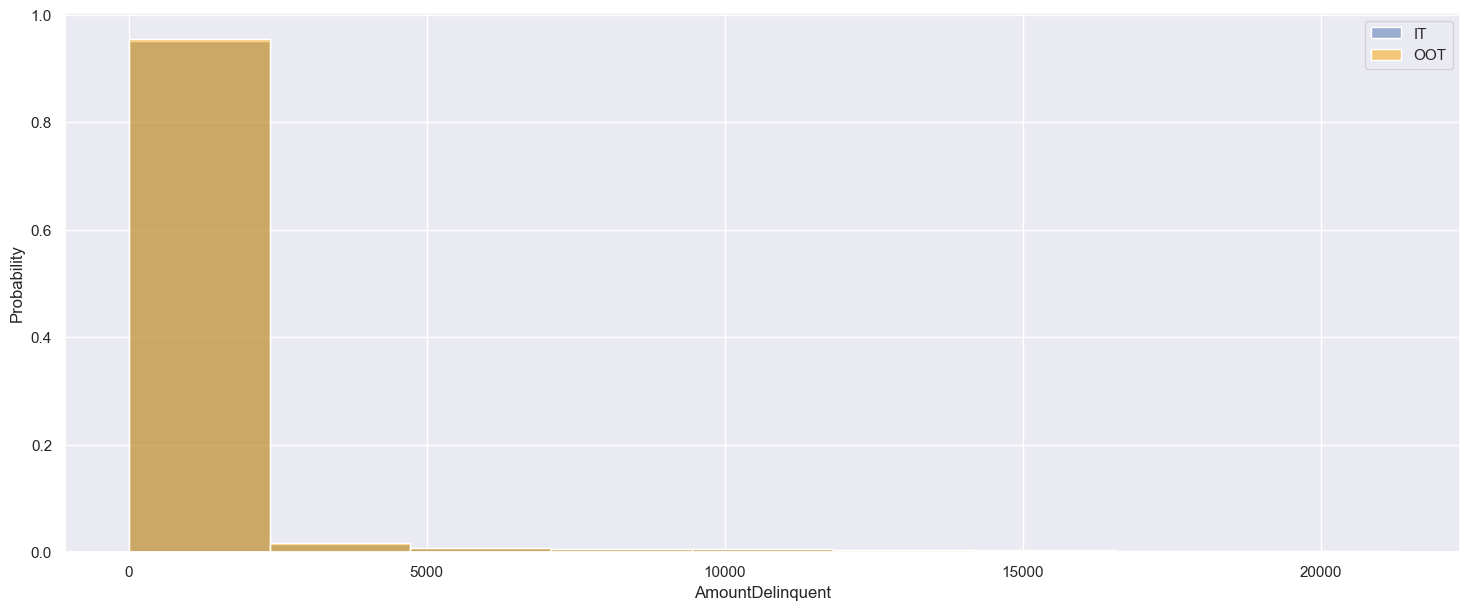

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,1030.348384,0.0,0.0,249209.0,0.0,0.0,6715.581776,0.0,15.558957,1893


In [62]:
desc_num(df, df_oot, "AmountDelinquent")

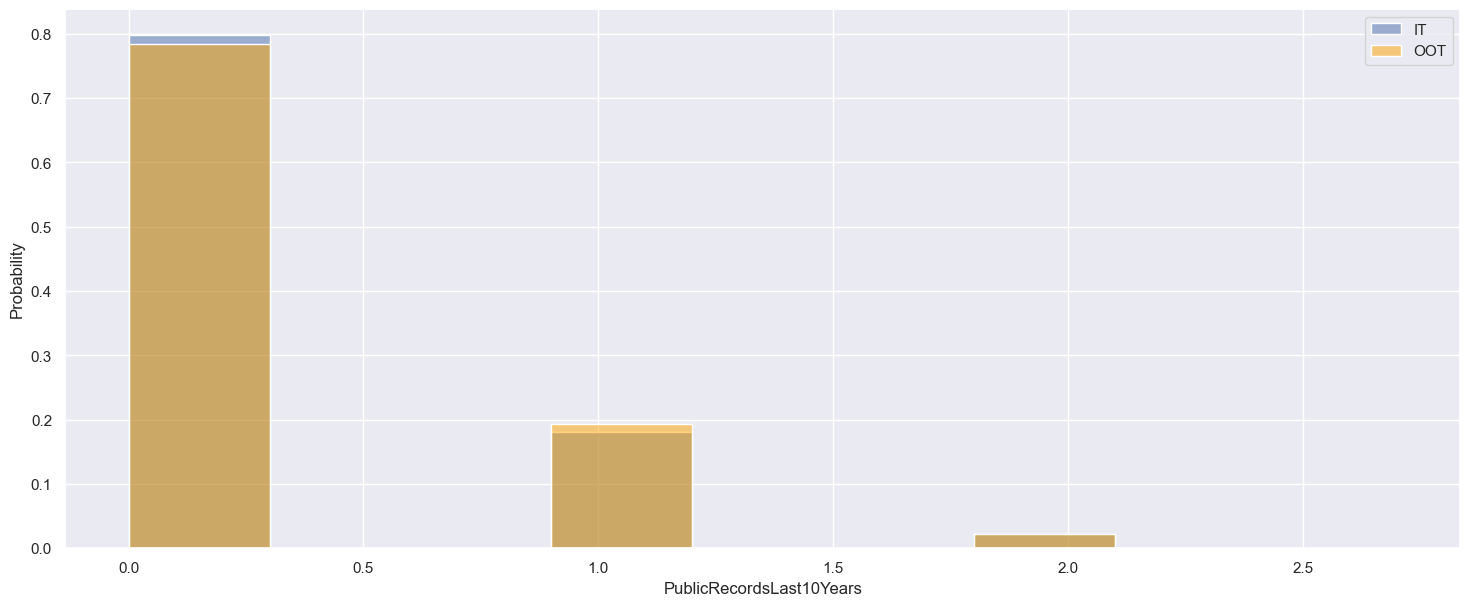

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,0.264908,0.0,0.0,12.0,0.0,0.0,0.630288,0.0,21.086713,12


In [63]:
desc_num(df, df_oot, "PublicRecordsLast10Years")

**TODO 5** Selecciona las dos variables menos estables, y procesalas con la función "desc_num" o "desc_cat"

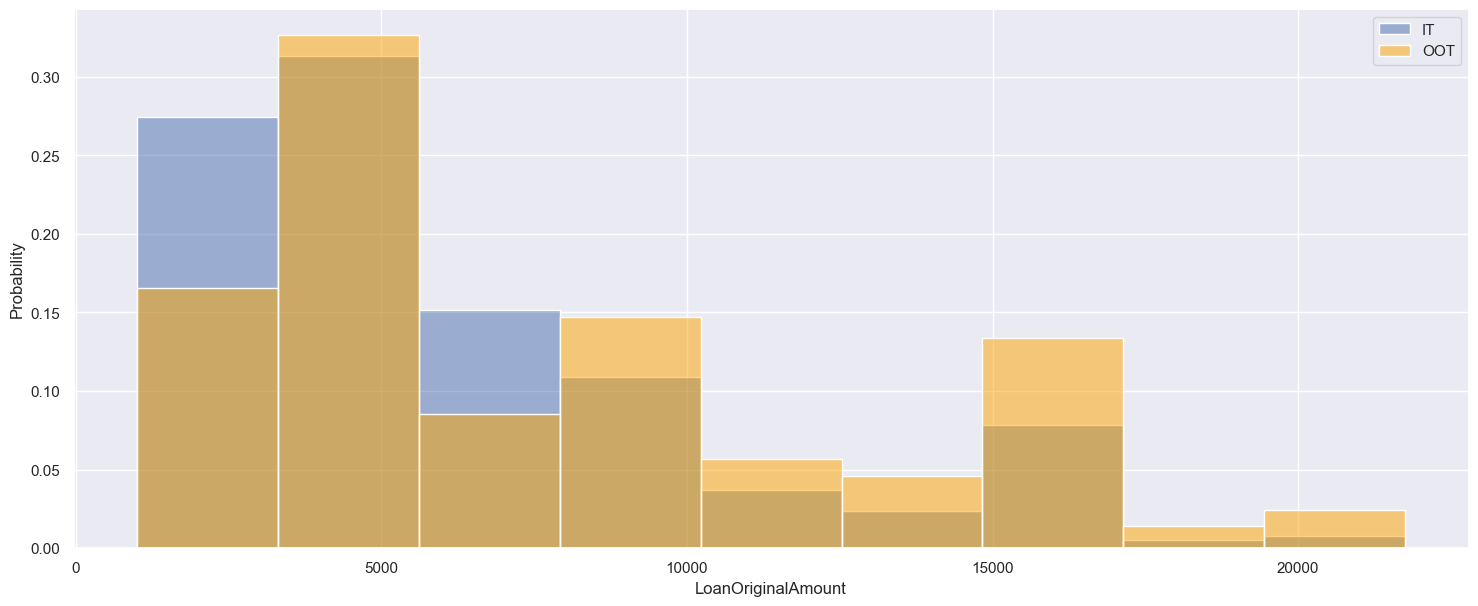

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,6411.536999,5000.0,1000,25000,3000.0,8000.0,4651.258896,0.0,100.0,723


In [64]:
desc_num(df, df_oot, "LoanOriginalAmount")

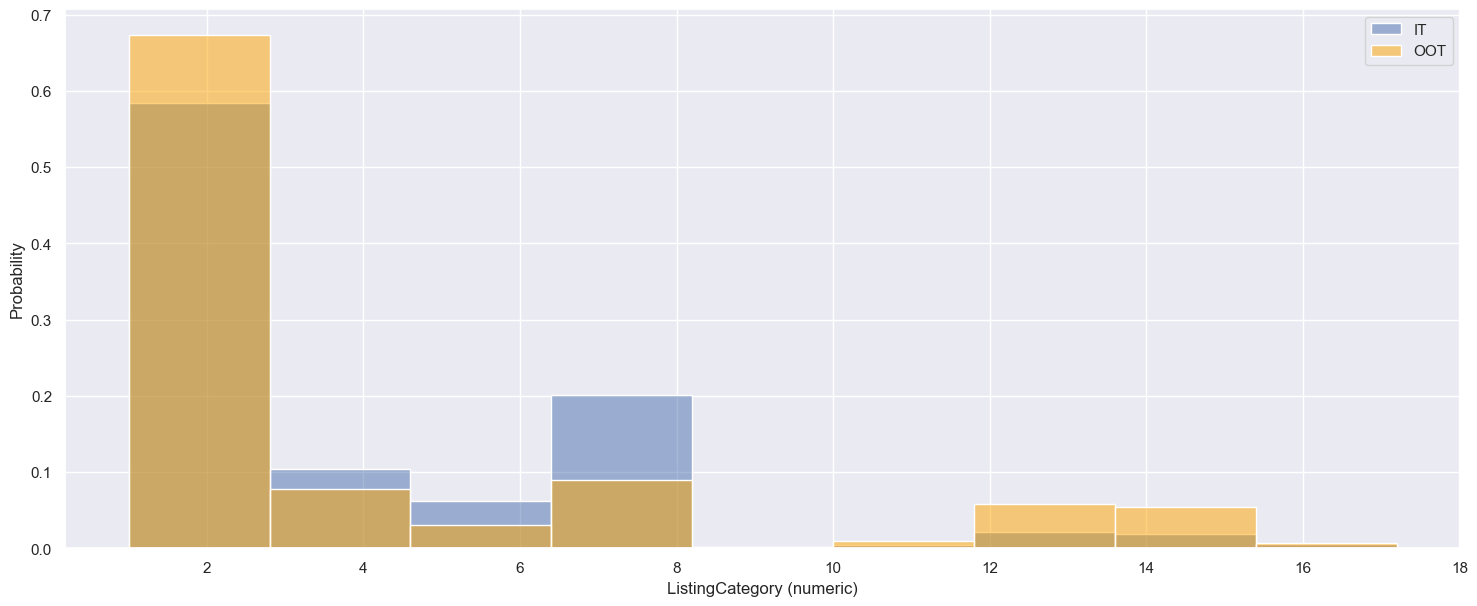

,mean,median,minimum,maximum,p25,p75,std,na,nonzero,unique
0,3.84029,2.0,0,20,1.0,7.0,4.10371,0.0,99.982339,20


In [65]:
desc_num(df, df_oot, "ListingCategory (numeric)")

In [70]:
#save the data, as it will come handy in future work
# Se escribe serializado
import pickle
#build a dictionary and serialize it
dict_dump = {'features': features,
             'corr_data': corr_relations,
             'iv_df': df_iv,
             'psi_df': df_psi}
pickle.dump(dict_dump, open("/Users/juan/Documents/Juan's MacBook Pro/CUNEF/Quinto/Credit Risk Analytics/data_solved/output_HW5.pkl", 'wb'))

In [69]:
# save the processed data
df.to_parquet("/Users/juan/Documents/Juan's MacBook Pro/CUNEF/Quinto/Credit Risk Analytics/data_solved/prosperLoanData_processed_train.parquet")
df_val.to_parquet("/Users/juan/Documents/Juan's MacBook Pro/CUNEF/Quinto/Credit Risk Analytics/data_solved/prosperLoanData_processed_val.parquet")
df_oot.to_parquet("/Users/juan/Documents/Juan's MacBook Pro/CUNEF/Quinto/Credit Risk Analytics/data_solved/prosperLoanData_processed_oot.parquet")